# Исследование продаж компьютерных игр
***

# Оглавление:<a class="anchor" id="TOC"></a>
* **[Задача](#mission)**
    - [1) Постановка задачи](#mission_1)
    - [2) Описание данных](#mission_2)
* **[I. Подготовка к исследованию, загрузка и ознакомление с данными](#1)**
    - [1) Объявляем класс Explorer и наполняем его методами](#1_1)
    - [2) Импортируем библиотеки](#1_2)
    - [3) Прочитаем данные](#1_3)
    - [4) Выведем первые пять строк каждой из таблиц, общую информацию](#1_4)
    - [5) Выведем общую статистку по датасету и наличие дубликатов](#1_5)
    - [6) Исправим регистр с помощью строкового метода str.lower()](#1_6)
    - [7) Ознакомимся со столбцами](#1_7)
    - [Вывод](#1_conclusion)
* **[II. Предобработка данных](#2)**
    - [1) Посчитаем и добавим в датасет информацию об общих продажах](#2_1)
    - [2) Избавимся от двух строк с пропусками в имени и жанре игры (2 из 16 715 - менее 1 %), а также в годе выпуска игры (269 из 16 715 - 1,6 %)](#2_2)
    - [3) Заполним пропуски в столбце с рейтингом аббревиатурой 'ne' (6 676 из 16 444 строк - 41 %), что означает Not Evaluated.](#2_3)
    - [4) Заполним пропуски (включая tbd) в столбцах с оценками критиков и пользователей плейсхолдером "-1", который означает отсутствие оценки.](#2_4)
    - [5) Конвертируем данные](#converting)
    - [6) Проверим датасет на выбросы](#2_6)
    - [Вывод](#2_conclusion)
* **[III. Анализ данных](#3)**
    - [1) Что означает 'tbd' в столбце с оценкой пользователя](#3_1)
    - [2) Подготовим алгоритм k близжайших соседей для предсказания оценок критиков и пользовательских оценок](#3_2)
    - [3) Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?](#3_3)    
    - [4) Как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?](#3_4)    
    - [5) Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.](#3_5) 
    - [6) Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.](#3_6) 
    - [7) Проведем дисперсионный анализ для уточнения ответа на предыдущий вопрос.](#3_7)
    - [8) Выясним какие пары средних статистически значимо различаются между собой.](#3_8)
    - [9) Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. ](#3_9)
    - [10) Соотнесем выводы о влиянии отзывов пользователей и критиков на продажи внутри одной популярной платформы с продажами игр на других платформах.](#3_10)    
    - [11) Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?](#3_11)
    - [12) Проверим гипотезу: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". ](#3_12)
    - [13) Проверим гипотезу: "Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные".](#3_13)
    - [14) Портреты пользователя каждого региона](#3_14)
        - [Северная Америка](#3_NA)
        - [Европа](#3_EU)
        - [Япония](#3_JP)
    - [Выводы](#3_conclusion)
* **[IV. Выводы](#final)**

# Задача <a class="anchor" id="mission"></a>
***

## 1) Постановка задачи <a class="anchor" id="mission_1"></a>

"Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года".

[В оглавление](#TOC)

## 2) Описание данных <a class="anchor" id="mission_2"></a>

**Источник данных - http://www.vgchartz.com/gamedb/**

**Оценки критиков и пользователей из www.metascore.com**

Ниже описание данных из задания:

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.


- На сайте источника базы данных отуствует подробное описание данных, но исходя из [содержания форума](#http://gamrconnect.vgchartz.com/thread.php?id=235335) в столбцах NA_sales, EU_sales, JP_sales, Other_sales содержится информация о количестве проданных копий. 
- Способ расчета количества проданных копий не ясен - по утверждениям создателей используется сложная система с различными коэффициентами. 
- **Тем не менее, принимая во внимание поставленные задачи, будем придерживаться сформулированного описания данных.**


[В оглавление](#TOC)

# I. Подготовка к исследованию, загрузка и ознакомление с данными  <a class="anchor" id="1"></a>
***

[В оглавление](#TOC)

## 1) Объявляем класс Explorer и наполняем его методами <a class="anchor" id="1_1"></a>

In [1]:
class Explorer:
    
    def histogram(self, data, n_bins, range_start, range_end, grid, cumulative=False, x_label = "", y_label = "", title = ""):
        """
        data - датасет
        n_bins - количество корзин
        range_start - минимальный икс для корзины
        range_end - максимальный икс для корзины
        grid - рисовать сетку или нет (False / True)
        
        
        histogram(data, n_bins, range_start, range_end, grid, x_label = "", y_label = "", title = "")
        
        Пример:
        histogram(df, 100, 0, 150, True, 'Количество иксов', 'Количество игриков', 'Заголовок')
        """
        # Создаем объект - график
        _, ax = plt.subplots()

        # Задаем параметры
        ax.hist(data, bins = n_bins, range = (range_start, range_end), cumulative = cumulative, color = '#4169E1')

        # Добавляем сетку
        if grid == True:
            ax.grid(color='grey', linestyle='-', linewidth=0.5)
        else:
            pass

        # Добавляем медиану, среднее и квартили
        ax.axvline(data.median(),linestyle = '--', color = '#FF1493', label = 'median')
        ax.axvline(data.mean(),linestyle = '--', color = 'orange', label = 'mean')
        ax.axvline(data.quantile(0.1),linestyle = '--', color = 'yellow', label = '1%')
        ax.axvline(data.quantile(0.99),linestyle = '--', color = 'yellow', label = '99%')
        ax.legend()
        ax.set_ylabel(y_label)
        ax.set_xlabel(x_label)
        ax.set_title(title)
        
    def scatterplot(self, x_data, y_data, x_label="", y_label="", title="", color = "r", yscale_log=False, figsize = (8, 6)):

        # Создаем объект - график
        _, ax = plt.subplots(figsize = (8, 6))

        # Задаем параметры для графика, определяем размер (s), цвет и прозрачность точек на графике
        ax.scatter(x_data, y_data, s = 10, color = color, alpha = 0.75)

        if yscale_log == True:
            ax.set_yscale('log')

        # Создаем описание осей и заголовок для графика
        ax.set_title(title)
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        
    def overlaid_histogram(self, data1, data2, n_bins = 0, data1_name="", data1_color="#539caf", data2_name="", data2_color="#7663b0", x_label="", y_label="", title=""):
        # Устанавливаем границы для корзин так чтобы оба распределения на графике были соотносимы
        max_nbins = 10
        data_range = [min(min(data1), min(data2)), max(max(data1), max(data2))]
        binwidth = (data_range[1] - data_range[0]) / max_nbins


        if n_bins == 0:
            bins = np.arange(data_range[0], data_range[1] + binwidth, binwidth)
        else: 
            bins = n_bins

        # Рисуем график
        _, ax = plt.subplots(figsize=(10,8))
        ax.hist(data1, bins = bins, color = data1_color, alpha = 0.65, label = data1_name)
        ax.hist(data2, bins = bins, color = data2_color, alpha = 0.65, label = data2_name)
        
        ax.axvline(data1.mean(),linestyle = '--', color = 'lime', label = 'mean for data 1')
                
        ax.axvline(data2.mean(),linestyle = '--', color = 'coral', label = 'mean for data 2')
                
        ax.set_ylabel(y_label)
        ax.set_xlabel(x_label)
        ax.set_title(title)
        ax.legend(loc = 'best')
        
    def corr_diagram(self, x):
        plt.figure(figsize=(12,10), dpi= 80)
        sns.heatmap(x.corr(), xticklabels=x.corr().columns, yticklabels=x.corr().columns, cmap='RdYlGn', center=0, annot=True)
        plt.title('Диаграмма корреляции', fontsize=22)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.show()
        
        
    def highlight_max(self, data, color='yellow'):
        '''
        highlight the maximum in a Series or DataFrame
        '''
        attr = 'background-color: {}'.format(color)
        #remove % and cast to float
        data = data.replace('%','', regex=True).astype(float)
        data[data == 1] = None
        if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
            is_max = (data == data.abs().max()) & (data !=1) 
            return [attr if v else '' for v in is_max]
        else:  # from .apply(axis=None)
            is_max = (data == data.abs().max()) & (data !=1) 
            return pd.DataFrame(np.where(is_max, attr, ''),
                                index=data.index, columns=data.columns)
    
    
    def highlight_sorted_corr(self, data, color='#00FF00'):
        '''
        highlight the maximum in a Series or DataFrame
        '''
        attr = 'background-color: {}'.format(color)
        #remove % and cast to float
        data = data.replace('%','', regex=True).astype(float)
        data[data == 1] = None
        if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
            is_max = (data > 0.1) & (data !=1) 
            return [attr if v else '' for v in is_max]
        else:  # from .apply(axis=None)
            is_max = (data == data.abs().max()) & (data !=1) 
            return pd.DataFrame(np.where(is_max, attr, ''),
                                index=data.index, columns=data.columns)
        
        
    def lineplot(self, x_data, y_data, x_label="", y_label="", title=""):
        # Создаем объект - график
        _, ax = plt.subplots(figsize=(8, 6))

        # Задаем параметры для линии: ширину (lw), цвет и прозрачность (alpha)
        ax.plot(x_data, y_data, lw = 2, color = '#539caf', alpha = 1)

        # Даем имена осям и заголовок для графика
        ax.set_title(title)
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        
        
    def double_lineplot(self, x_data_1, y_data_1, x_data_2, y_data_2, x_label="", y_label="", title="", label_one="", label_two=""):
        # Создаем объект - график
        _, ax = plt.subplots(figsize=(8, 6))

        # Задаем параметры для линии: ширину (lw), цвет и прозрачность (alpha)
        ax.plot(x_data_1, y_data_1, lw = 2, color = '#6400e4', alpha = 1, label = label_one)
        ax.plot(x_data_2, y_data_2, lw = 2, color = '#ffc740', alpha = 1, label = label_two)

        # Даем имена осям и заголовок для графика
        ax.set_title(title)
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        ax.legend(loc = 'best')
    
        
    def hexbin(self, data, x, y):
        data.plot(x = x, y = y, kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
        
        
    def bar_plotter(self, data):
        data.plot.bar(rot=0, figsize = (16, 5))
        
        
    def categorical_counter_plot(self, data, column, x = '', y = ''):
        if x == '' or y == '':
            plt.rcParams["figure.figsize"] = (15, 10)
        else:
            plt.rcParams["figure.figsize"] = (x, y)
        
        order = data[column].value_counts().index
            
        ax = sns.countplot(data[column], order = order)
        ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)
        
        plt.xticks(rotation=90)
        
       
    def sns_scatterplot(self, data, x="", y="", hue="", size="", palette=""):
        
        sns.set(style="whitegrid")

        f, ax = plt.subplots(figsize=(15, 10))
        
        if palette == True:
            sns.scatterplot(ax = ax, x=x, y=y, palette="ch:r=-.2,d=.3_r", 
                            hue=hue, size=size, sizes=(1, 200), linewidth=0, data=data)
        else:
            sns.scatterplot(ax = ax, x=x, y=y,
                            hue=hue, size=size, 
                            sizes=(1, 200), linewidth=0, data=data)
            
    def sns_catplot(self, data, x="", y="", hue=""):
        sns.set(style='whitegrid')
        
        sns.catplot(x=x, y=y, hue=hue, kind='bar', errwidth=0, 
            data=data, height=5, aspect=3)
        
    def pandahug(self, some_stuff):
        return pd.DataFrame(some_stuff)
    
        
    def sorted_corr(self, data, attr):
        correlated = pd.DataFrame(data.corr()[attr].sort_values(ascending = False))
        return correlated    
    
    
    def transformer(self, data, name, grouper, func):
        """
        data - датасет
        name - столбец в котором меняем значения
        grouper - столбец по которому группируем
        func - пременяемая функция mean, median и т.д.
        """
        name = name
        data.loc[data[name].isnull(), name] = data.groupby(grouper)[name].transform(func)
        
        
    def normalize(self):
        lambda x: (x - x.mean()) / x.std()
        
        
    def smape(self, y_test, y_predict): 
        y_test, y_predict = np.array(y_test), np.array(y_predict)
        return np.mean((np.abs((y_predict - y_test)) / np.mean(np.abs(y_test) + np.abs(y_predict + 0.1**99))) * 100)
    
    
    def mape(self, y_test, y_predict): 
        y_test, y_predict = np.array(y_test), np.array(y_predict)
        return np.median((np.abs((y_test - y_predict)) / (y_test + 0.1**99)) * 100)
    
    
    def min_max_normalize(lst):
        minimum = min(lst)
        maximum = max(lst)
        normalized = []
    
        for value in lst:
            normalized_num = (value - minimum) / (maximum - minimum)
            normalized.append(normalized_num)
        
        return normalized

    
    class Display(object):
        """Выводит HTML представление нескольких объектов"""
        template = """<div style="float: left; padding: 10px;">
        <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
        </div>"""
        def __init__(self, *args):
            self.args = args

        def _repr_html_(self):
            return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                             for a in self.args)

        def __repr__(self):
            return '\n\n'.join(a + '\n' + repr(eval(a))
                               for a in self.args)

In [2]:
explorer = Explorer()

[В оглавление](#TOC)

## 2) Импортируем библиотеки <a class="anchor" id="1_2"></a>

In [3]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import random
import numpy as np
import math

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import squarify 

from matplotlib import dates
import datetime

from scipy.stats import ttest_ind
from scipy.stats import norm
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as lr
from sklearn.preprocessing import StandardScaler as ss
from sklearn.neighbors import KNeighborsRegressor as knnr
from sklearn.preprocessing import MinMaxScaler

from IPython.display import HTML

[В оглавление](#TOC)

## 3) Прочитаем данные <a class="anchor" id="1_3"></a>

In [5]:
df = pd.read_csv('/datasets/games.csv')

[В оглавление](#TOC)

## 4) Выведем первые пять строк каждой из таблиц, общую информацию <a class="anchor" id="1_4"></a>

In [7]:
df.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [8]:
df.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
13517,Grey's Anatomy: The Video Game,DS,2009.0,Adventure,0.03,0.01,0.00,0.00,NaN,7.5,T
4072,Puzzle & Dragons Z + Super Mario Bros. Edition,3DS,2015.0,Puzzle,0.06,0.07,0.34,0.01,NaN,NaN,NaN
4675,Grudge Warriors,PS,1999.0,Action,0.23,0.16,0.00,0.03,NaN,NaN,NaN
12707,Real Bout Garou Densetsu Special: Dominated Mind,PS,1998.0,Fighting,0.00,0.00,0.05,0.00,NaN,NaN,NaN
16129,Shinobi Koutsutsu,PSP,2014.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


&#9889; **Вывод:** в датасете 16 715 строк, есть множественные пропуски: в оценках и возрастном рейтинге, два пропущенных значения в названии и жанре, более двухсот пятидесяти пропусков в годе выпуска. Есть проблемы с типами данных в столбце user_score, rating.

[В оглавление](#TOC)

## 5) Выведем общую статистку по датасету и наличие дубликатов <a class="anchor" id="1_5"></a>

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


Наблюдения за период от 1980 года до 2016 года. Странных значений не усматривается. Выведем информацию о категориальных данных:

In [11]:
df.describe(include = ['object']).T

,count,unique,top,freq
Name,16713,11559,Need for Speed: Most Wanted,12
Platform,16715,31,PS2,2161
Genre,16713,12,Action,3369
User_Score,10014,96,tbd,2424
Rating,9949,8,E,3990


В датасете 11 559 наименований игр, 31 платформа, 12 жанров и 8 различных рейтингов, которые повторяются из строки в строку.

Как следствие в датасете есть дубликаты, и много дубликатов: это естественно, поскольку в датасете содержится дублирующаяся информация о платформах, играх, выходивших на разных платформах и в разные года, жанрах и рейтинге. В оценках пользователей 2424 раза внесен плейсхолдер 'tbd' - кандидат на цифровую замену.

Посмотрим, есть ли полные дубликаты:

In [12]:
(df.duplicated() == True).sum()

0

&#9889; **Вывод:** в датасете наблюдения за период от 1980 года до 2016 года, без странных значений и обусловленными характером данных дубликаты в отельных столбцах

[В оглавление](#TOC)

## 6) Исправим регистр с помощью строкового метода str.lower() <a class="anchor" id="1_6"></a>

Для удобства сразу исправим регистр в датасете

In [13]:
df.columns = df.columns.str.lower()
df.name = df.name.str.lower()
df.platform = df.platform.str.lower()
df.genre = df.genre.str.lower()
df.rating = df.rating.str.lower()

[В оглавление](#TOC)

## 7) Ознакомимся со столбцами <a class="anchor" id="1_7"></a>

#### - столбец 'name'

Посмотрим сколько игр выпускалось по годам

In [14]:
games_per_year = explorer.pandahug(df.groupby('year_of_release').name.count())

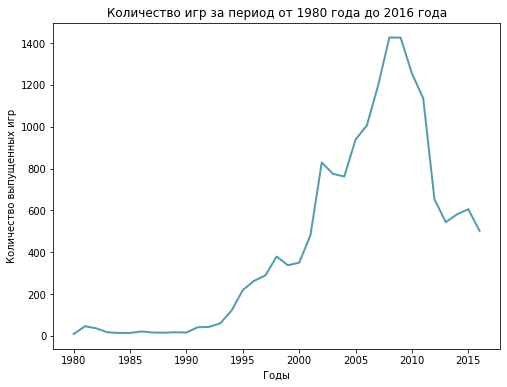

In [15]:
explorer.lineplot(games_per_year.index, games_per_year.name, x_label="Годы", y_label="Количество выпущенных игр", title="Количество игр за период от 1980 года до 2016 года")

In [16]:
games_per_year.max()

name    1427
dtype: int64

In [17]:
games_per_year.min()

name    9
dtype: int64

In [18]:
games_per_year.sort_values(by = 'name', ascending = False).head(16)

,name
year_of_release,
2008.0,1427
2009.0,1426
2010.0,1255
2007.0,1197
2011.0,1136
2006.0,1006
2005.0,939
2002.0,829
2003.0,775


Пик - 1427 игр в 2008 году, а после троекратное снижение до 502 игр в 2016 году. Проверим пропущенные значения в столбце имя - можем ли их восполнить

In [19]:
df.query('name.isna() == True')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Там же где пропущены имена, сразу же и обнаружились пропуски в жанрах. 

&#9889; **Вывод:** для двух наблюдений с пропущенными наименованиями и жанрами мало идентифицирующих признаков - год и продажи. Кандидаты на удаление.

[В оглавление](#TOC)

#### - столбец 'genre'

In [20]:
genre = explorer.pandahug(df.groupby('genre').name.count()).sort_values(by = 'name', ascending = False)

In [21]:
genre

,name
genre,
action,3369
sports,2348
misc,1750
role-playing,1498
shooter,1323
adventure,1303
racing,1249
platform,888
simulation,873


Экшн - вне всяких сомнений самый популярный жанр: спасибо росту произодительности компьютеров. Визуализируем результат.

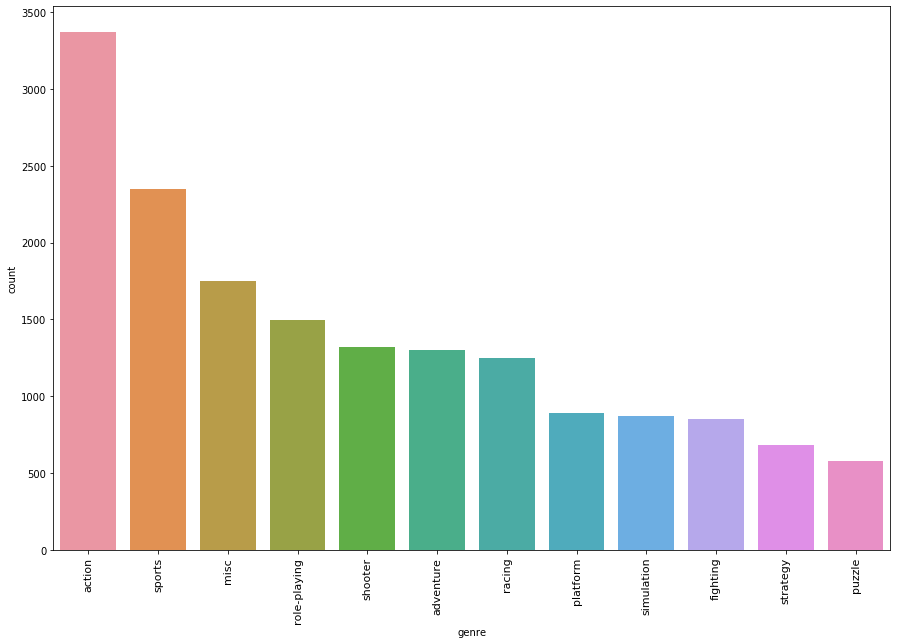

In [22]:
explorer.categorical_counter_plot(df, 'genre', 15, 10)

В конце восьмедисятых и начале девяностых должны были лидировать эдвенчуры - проверим.

In [23]:
before_1995 = df.query('year_of_release < 1995')

In [24]:
explorer.pandahug(before_1995.groupby('genre').name.count()).sort_values(by = 'name', ascending = False)

,name
genre,
action,85
platform,70
sports,68
shooter,49
role-playing,47
fighting,45
puzzle,36
racing,23
misc,20


Yikes! Твердое последнее место, даже пазлы выше. А экшены как были на первом месте так и остались. Ну ладно, жаль.

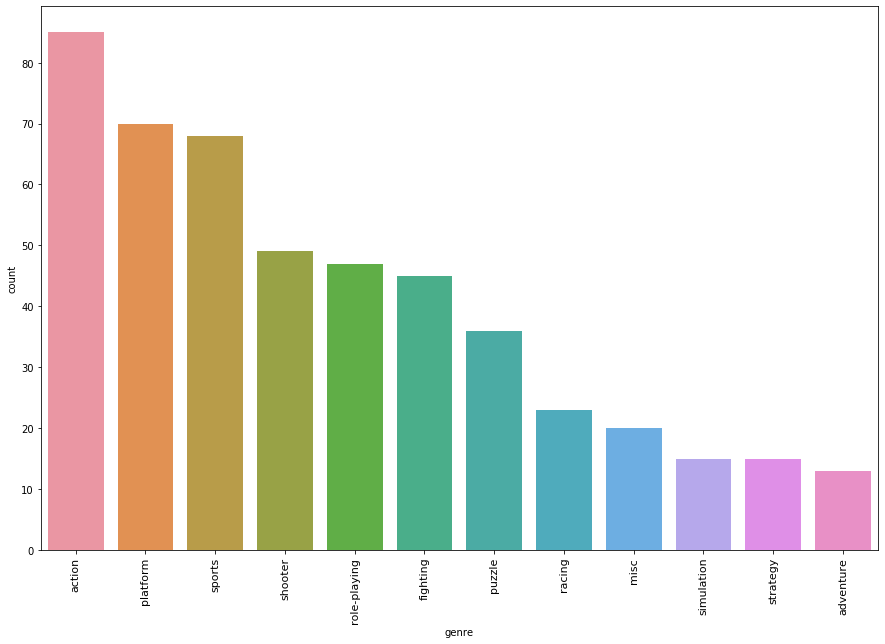

In [25]:
explorer.categorical_counter_plot(before_1995, 'genre', 15, 10)

&#9889; **Вывод:** самые популярные жанры во все времена - экшн (лидер с большим отрывом), спортивные симуляторы, рпг и шутеры.

[В оглавление](#TOC)

#### - столбец 'platform'

Посчитаем какие платформы и как часто стречаются в датасете с помощью метода groupby

In [26]:
platform = explorer.pandahug(df.groupby('platform').name.count()).sort_values(by = 'name', ascending = False)

Выведем десять самых часто встречающихся в датасете платформ

In [27]:
platform.head(10)

,name
platform,
ps2,2161
ds,2151
ps3,1331
wii,1320
x360,1262
psp,1209
ps,1197
pc,974
xb,824


Визуализируем результат:

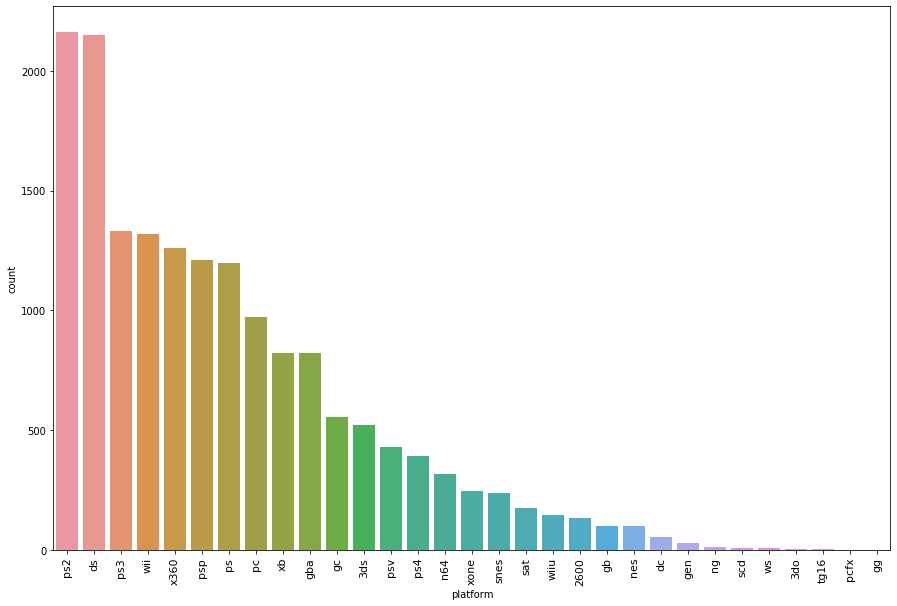

In [28]:
explorer.categorical_counter_plot(df, 'platform', 15, 10)

&#9889; **Вывод:** две верхние строчки почти с двухкратным отрывом занимают Плейстешен 2 и Нинтендо ДиЭс, затем группа - Плейстешен 3, Вии, Иксбокс360, Пиэспи и первый плейстейшен, а замыкают десятку персональный компьютер, ИксБокс(?) и ГеймБой. В принципе, соотношение похоже на настоящее, даже с поправкой на время расклад за три года не изменился - доминирующее положение приставок и портативных консолей, где с отрывом лидруют приставки компании Сони, и где-то между ними персональные компьютеры. 

[В оглавление](#TOC)

#### - **year_of_release**

Посмотрим, что за пропуски в годах издания

In [29]:
yor = explorer.pandahug(df.groupby('year_of_release').name.count()).sort_values(by = 'name', ascending = False)

In [30]:
yor_na = df.query('year_of_release.isna()')
yor_na.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
8150,twisted metal: small brawl,ps,NaN,action,0.10,0.07,0.00,0.01,51.0,7.6,t
6019,nicktoons: battle for volcano island,gc,NaN,action,0.22,0.06,0.00,0.01,NaN,7,e
15006,tube slider,gc,NaN,racing,0.02,0.00,0.00,0.00,62.0,tbd,e
9293,disney's cinderella: magical dreams,gba,NaN,platform,0.10,0.04,0.00,0.00,69.0,tbd,e
10993,the daring game for girls,wii,NaN,adventure,0.09,0.00,0.00,0.01,NaN,tbd,e
12880,jewel link chronicles: mountains of madness,ds,NaN,puzzle,0.00,0.05,0.00,0.01,NaN,tbd,e10+
3289,advance wars: days of ruin,ds,NaN,strategy,0.43,0.12,0.00,0.05,86.0,8.7,e10+
2169,yakuza 4,ps3,NaN,action,0.15,0.13,0.63,0.05,78.0,8,m
10258,giftpia,gc,NaN,role-playing,0.00,0.00,0.11,0.00,NaN,NaN,NaN
5194,cubix robots for everyone: clash 'n' bash,gba,NaN,action,0.26,0.10,0.00,0.01,NaN,NaN,NaN


Посмотрим сколько пропусков количественно

In [31]:
len(yor_na)

269

&#9889; **Вывод:** двести шестьдесят девять из шестнадцати тысяч семисот пятнадцати - всего полтора процента, кандидаты на удаление.

[В оглавление](#TOC)

#### - **critic_score**

Массовые пропуски в оценках критиков, посмотрим повнимательнее.

In [32]:
critics_per_year = explorer.pandahug(df.groupby('year_of_release').critic_score.count())

Выведем количество оценок за первые двадцать лет и вторые шестнадцать

In [33]:
firts_20 = critics_per_year.head(21)

In [34]:
last_16 = critics_per_year.tail(16)

In [35]:
explorer.Display('firts_20', 'last_16')

,critic_score
year_of_release,
1980.0,0
1981.0,0
1982.0,0
1983.0,0
1984.0,0
1985.0,1
1986.0,0
1987.0,0
1988.0,1


Визуализируем результат.

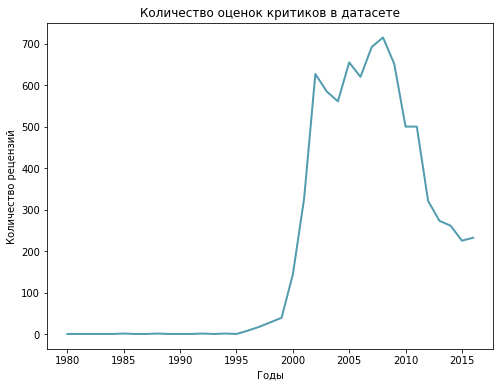

In [36]:
explorer.lineplot(critics_per_year.index, critics_per_year.critic_score, x_label="Годы", y_label="Количество рецензий", title="Количество оценок критиков в датасете")

В датасете практически нет информации об оценках критиков вплоть до 1996 года - первая причина пропусков. Означает ли это, что после 1996 года пропусков или будет меньше, или не будет вовсе и, как следствие, проблема с пропусками фактически решена?

In [37]:
len(df.query('critic_score.isna() == True and year_of_release > 1995'))

7760

Оказывается нет - 7760 из 8 578‬ пропусков в данных об играх, выпущенных после 1995 года. Сразу посмотрим в столбец user_score, поскольку оба столбца имеют одну природу

#### - **user_score**

In [38]:
user_per_year = explorer.pandahug(df.groupby('year_of_release').user_score.count())

Также выведем первые двадцать и последние шестнадцать лет

In [39]:
firts_20_us = user_per_year.head(21)

In [40]:
last_16_us = user_per_year.tail(16)

In [41]:
explorer.Display('firts_20_us', 'last_16_us')

,user_score
year_of_release,
1980.0,0
1981.0,0
1982.0,0
1983.0,0
1984.0,0
1985.0,1
1986.0,0
1987.0,0
1988.0,1


Очень похожая картина с оценками критиков. Визуализируем результат:

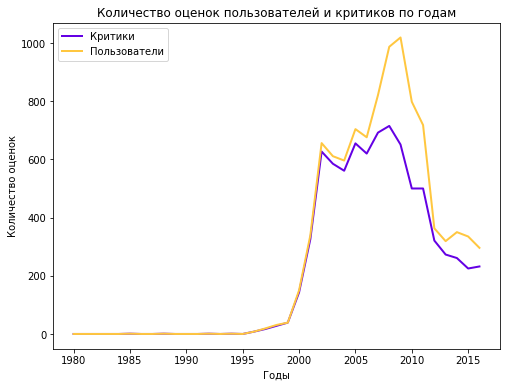

In [42]:
explorer.double_lineplot(critics_per_year.index, critics_per_year.critic_score, user_per_year.index, user_per_year.user_score, x_label="Годы", y_label="Количество оценок", title="Количество оценок пользователей и критиков по годам", label_one="Критики", label_two="Пользователи")

С начала двухтысячных наступило время интернет-изданий, интернет-журналистов и интернет-комментаторов. Для наглядности выведем рядом два среза.

In [43]:
explorer.Display('user_per_year', 'critics_per_year')

,user_score
year_of_release,
1980.0,0
1981.0,0
1982.0,0
1983.0,0
1984.0,0
1985.0,1
1986.0,0
1987.0,0
1988.0,1


Любопытно, что и пользовательских оценок и оценок критиков стало меньше: связано ли это с общим сокращением изданий и площадок для геймеров? К сожалению, в датасете нет данных для ответа на вопрос.

In [44]:
user_score = explorer.pandahug(df.groupby('user_score').name.count()).sort_values(by = 'user_score', ascending = False)

&#9889; **Вывод:** 

1) Пропуски обусловлены несколькими факторами: 

- издания в которых пишут о компьютерных играх выходят с 1974 года, первое интернет-издание, предположительно, возникло в 1994 года, но интернет-издания по тематике массовым явлением стали только [начиная с двухтысячных](https://en.wikipedia.org/wiki/Video_game_journalism). Как следствие, отсутствие данных вплоть до 1996 года является полне нормальным;
- сайт metacritic.com был запущен только в [2001 году](#https://www.metacritic.com/about-metacritic). Методология аггрегирования оценок такова, что для взвешенной усредненной оценки необходимо не менее четырех независимых рецензии. Поэтому отсутствие оценок на сайте, который является источником для датасета, говорит о том, что игра не получила достаточно выраженных в цифровой оценке рецензий для вычисления средневзвешанного балла. В отношении игр до 1996 года - это обусловлено еще и тем, что данные попросту неоткуда взять. Что же касается данных после - 1996 года, то издания пишущие об играх не стремятся рецензировать все подряд: это лишено смысла, да игр выходит слишком много, поэтому неудивительно отсутствие оценок для большинства игр. Пользователей больше, чем профильных журналов - поэтому пропусков меньше, а оценок больше, что хорошо видно на графике;
- немаловажным фактором является особенности ручного заполнения исходного датасета на сайте http://www.vgchartz.com/gamedb/ - оценки могли быть попросту не внесены в датасет;

2) Не представляется необходимым заполнение пропусков в данных столбцах. Для исследования это несущественно, во-первых, потому что нас интересуют продажи игр, а не способ их оценивания, во-вторых, потому что для корректного вывода нас интересуют только настоящие оценки критиков и пользователей (повлияли ли они в реальности на продажи), в-третьих, отсутвие оценок и продажи игры само по себе является существенным аспектом - поскольку в датасете содержаться игры, которые продались минимум в 100 000 копий, то значит и без оценок игры неплохо продаются (а их влияние, возможно, преувеличено). Следовательно, заполнение этих пропусков противоречит смыслу исследования, нарушает логику датасета;

3) впрочем, на всякий случай мы подготовим [алгоритм](#3_2), который при необходимости позволит предугадать оценку критиков и пользователей в отношении компьютерной игры.

[В оглавление](#TOC)

#### - **rating**

Выведем уникальные значения в столбце

In [45]:
df.rating.unique()

array(['e', nan, 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'], dtype=object)

In [46]:
explorer.pandahug(df.groupby('rating').name.count()).sort_values(by = 'name', ascending = False)

,name
rating,
e,3990
t,2961
m,1563
e10+,1420
ec,8
k-a,3
rp,3
ao,1


Большинство игр без возрастных ограничений (3990), либо от тринадцати лет (2961). Немало игр со взрослым контентом (1563) и от десяти лет (1420). Остальные рейтинги слишком малочисленны. Визуализируем распространенность возрастных рейтингов в отношении игр из датасета

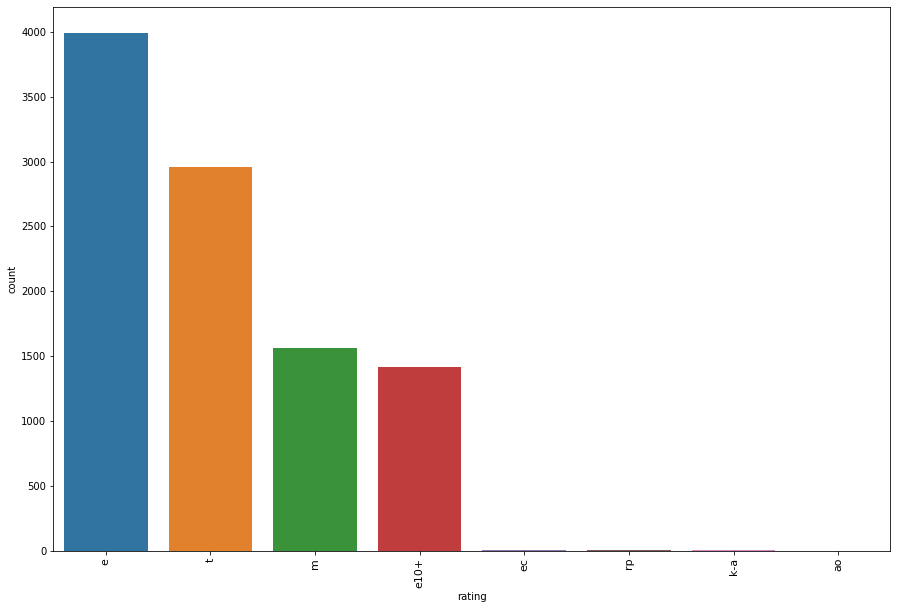

In [47]:
explorer.categorical_counter_plot(df, 'rating', 15, 10)

В столбце с рейтингом пропущены 6 766 из 16 715 значений (40 %). Исходя из информации на [Википедии](#https://en.wikipedia.org/wiki/Entertainment_Software_Rating_Board) - рейтинговое агентство ESRB основано в сентябре 1994 года, яляется общественной организацией. Означает ли это, что все пропуски будут в отношении игр, выпущенных до 1994 года?

In [48]:
len(df.query('rating.isna() == True and year_of_release > 1994'))

6195

Почти все пропуски - 6195 из 6766 в данных об играх после 1994 года. Снова обратимся к странице ESRB на [Википедии](#https://en.wikipedia.org/wiki/Entertainment_Software_Rating_Board):

> The ESRB is officially recognized, implemented and used in the three major countries of North America: Canada, Mexico and the United States.

Вот и ответ - организация носит локальный характер. Принимая во внимание цел исследования, столбец с рейтингом будет сохранен (и теперь ясно в каком регионе рейтинг будет влиять на продажи). Пропуски будут заменены на плейсхолдер "ne" - Not Evaluated, не оценивается.

&#9889; **Вывод:**  6 766 (40 %) пропусков в столбце с рейтингом обусловлены локальным характером рейтингового агентства ESRB.

[В оглавление](#TOC)

## **Вывод:** <a class="anchor" id="1_conclusion"></a>

1. В проекте один датасет в формате csv.
2. В датасете 16715 строк, есть множественные пропуски:
    - Name - 2 (менее 1 %)
    - Genre - 2 (менее 1 %)
    - Year_of_Release - 269‬ (2 %)
    - User_Score - 6 701‬ (40 %)   
    - Rating - 6 766 (40 %),
    - Critic_Score - 8 578‬ (51 %)
3. Пропуски в столбцах с наименованием, жанром и годом выпуска - кандидаты на удаление из-за малочисленности и, как следствие, малозначительности.
4. Пропуски в столбцах с оценками критиков и пользователей отвечают логике датасета, обусловленны методологией аггрегации оценок, заполнением датасета и периодом сбора данных. Столбец и, как следствие, пропуски будут сохранены, поскольку это соответствует целям исследования. 
5. В отношении пропусков в оценках критиков и пользователей будет подготовлен алгоритм, который позволит в случае необходимости предсказать оценку.
6. Пропуски в столбце с рейтингом обусловлены локальным характером рейтингового агентства ESRB. Столбец будет сохранен по причине поставленных для исследования вопросов. Пропуски будут заменены плейсхолдером "ne" - Not Evaluated.
7. Усматривается потребность в создании плейсхолдеров для пропусков в столбцах с оценками и рейтингом.
8. Значение 'tbd' в столбце user_score - кандидат на цифровую замену.
9. Странных значений не усматривается. 
10. В датасете есть дубликаты в различных столбцах, но нет построчных дубликатов.

[В оглавление](#TOC)

# II. Предобработка данных <a class="anchor" id="2"></a>
***

## 1) Посчитаем и добавим в датасет информацию об общих продажах <a class="anchor" id="2_1"></a>

Поскольку в столбцах с наблюдениями о продажах по регионам нет пропусков - расчет об общих продажах можно сделать сразу

In [49]:
df.eval('total_sales = na_sales + eu_sales + jp_sales + other_sales + jp_sales + other_sales', inplace = True)

Выведем результат

In [50]:
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e,94.76
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,47.82
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,42.60
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e,39.00
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,42.60


[В оглавление](#TOC)

## 2) Избавимся от двух строк с пропусками в имени и жанре игры (2 из 16 715 - менее 1 %), а также в годе выпуска игры (269 из 16 715 - 1,6 %) <a class="anchor" id="2_2"></a>

В столбце год выпуска 269 пропусков в годе выпуска. К сожалению, для ручного заполнения строк слишком много. Но поскольку пропущенно менее 2 % от датасета - отбросив эти строки мы не исказим выборку.

In [51]:
df.dropna(subset=['name', 'year_of_release'], inplace = True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
total_sales        16444 non-null float64
dtypes: float64(7), object(5)
memory usage: 1.6+ MB


[В оглавление](#TOC)

## 3) Заполним пропуски в столбце с рейтингом аббревиатурой 'ne' (6 676 из 16 444 строк - 41 %), что означает Not Evaluated. <a class="anchor" id="2_3"></a>

Прежде, чем заполним данные - сделаем срез с заполненным рейтингом для целей дальнейшего исследования.

In [53]:
df_rating = df.query('rating.isna() == False').copy()

In [54]:
df.rating.fillna('ne', inplace = True)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             16444 non-null object
total_sales        16444 non-null float64
dtypes: float64(7), object(5)
memory usage: 1.6+ MB


[В оглавление](#TOC)

## 4) Заполним пропуски (включая tbd) в столбцах с оценками критиков и пользователей плейсхолдером "-1", который означает отсутствие оценки. <a class="anchor" id="2_4"></a>

Прежде, чем заполним данные - сделаем срез с оценками критиков и пользователей для целей дальнейшего исследования.

In [56]:
df_scores = df.query('user_score.isna() == False').copy()

In [57]:
df.fillna(-1, inplace = True)

In [58]:
df.replace('tbd', -1, inplace = True)

[В оглавление](#TOC)

## 5) Конвертируем данные <a class="anchor" id="converting"></a>

Проверим какие типы данных в датасете

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       16444 non-null float64
user_score         16444 non-null object
rating             16444 non-null object
total_sales        16444 non-null float64
dtypes: float64(7), object(5)
memory usage: 1.6+ MB


Приведем к целочисленному типу столбец с годом выпуска (но не станем конвертировать в дату за отсутствием потребности) - года считаются в целых числах; изменим тип данных на вещественный в столбце с оценками пользователей - поскольку оценки расчитаны с округлением до одного знака после запятой.

In [60]:
try:
    df['year_of_release'] = df.year_of_release.astype(int)
    df['user_score'] = df.user_score.astype(float)
except:
    print("Ошибка!")
finally:
    print('Конвертация прошла успешно.')

Конвертация прошла успешно.


In [61]:
df.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
11207,jumper: griffin's story,wii,2008,action,0.08,0.0,0.00,0.01,28.0,2.5,t,0.10
16465,s.y.k: shinsetsu saiyuuki portable,psp,2010,adventure,0.00,0.0,0.01,0.00,-1.0,-1.0,ne,0.02
5980,itadaki street 2: neon sign wa bara iro ni,snes,1994,misc,0.00,0.0,0.29,0.00,-1.0,-1.0,ne,0.58
10012,singstar latino,ps3,2009,misc,0.11,0.0,0.00,0.01,-1.0,-1.0,t,0.13
16179,pro angler moves,ps3,2012,sports,0.01,0.0,0.00,0.00,-1.0,-1.0,e,0.01


[В оглавление](#TOC)

## 6) Проверим датасет на выбросы <a class="anchor" id="2_6"></a>

#### Построим общую диаграмму "ящик с усами" для продаж, оценок пользователей и оценок критиков

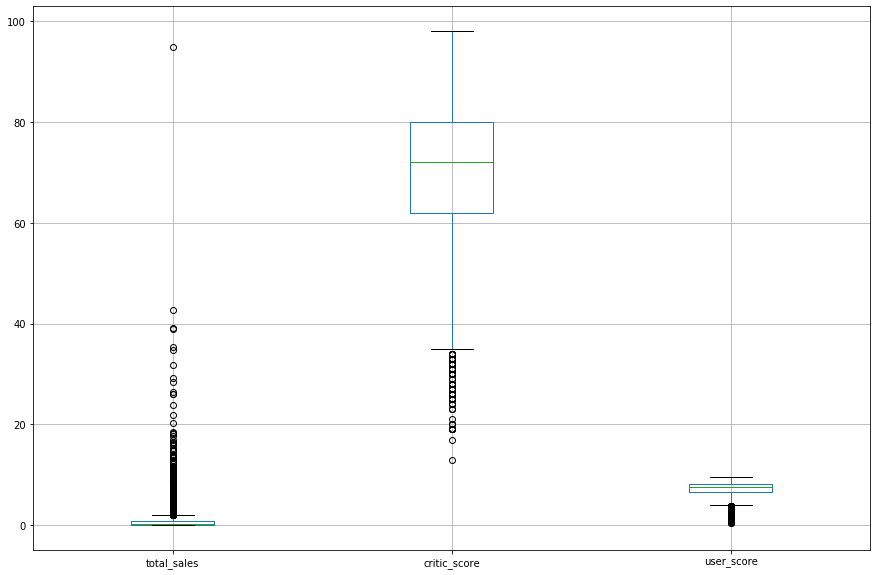

In [62]:
df_outliers = df[['total_sales', 'critic_score', 'user_score']].query('critic_score != -1 and user_score != -1')
df_outliers.boxplot(figsize=(15,10))

#### Отдельно для продаж

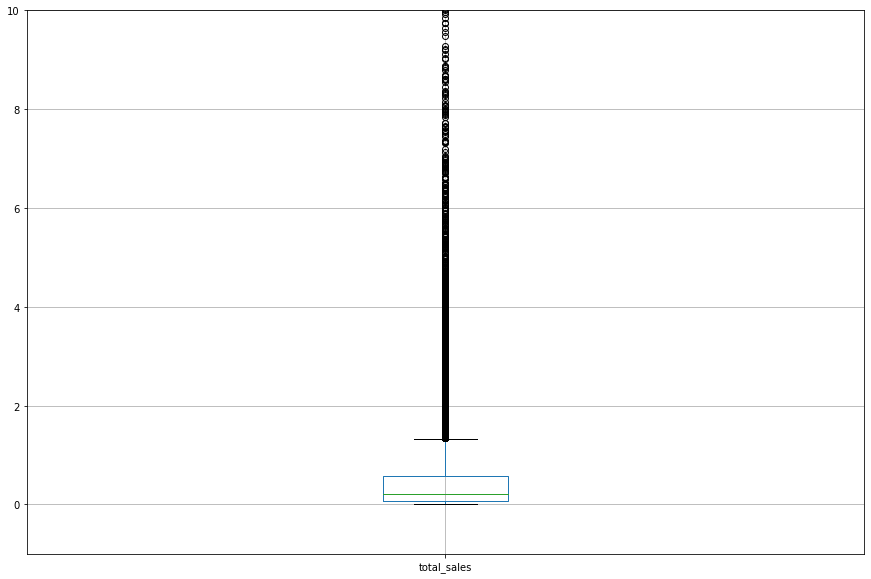

In [63]:
plt.ylim(-1, 10)
df.boxplot('total_sales')

Нижний «ус» упирается в 0, минимальное значение  датасете. Верхний заканчивается около 1.6 млн. Более высокие значения сливаются в единую линию: выбросов очень много и они сильно влияют на среднее, принимая во внимание положение медианы на графике.

#### Отдельно для оценок критиков

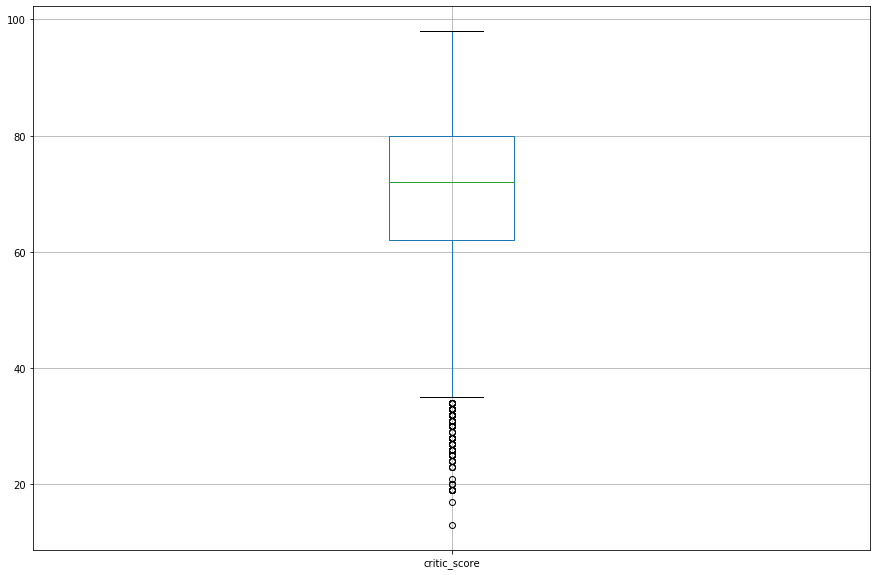

In [64]:
df_outliers.boxplot('critic_score')

Нижний «ус» в районе 35, а верхний заканчивается около 98. Ни одна игра не получила 0 или 100 баллов. Выбросы есть, но таких немного и все они ниже 35 - это какие-то совсем ужасные игры. Выбросы оказывают влияние на среднее, но незначительное - медиана близка к среднему.

#### Отдельно для оценок пользователей

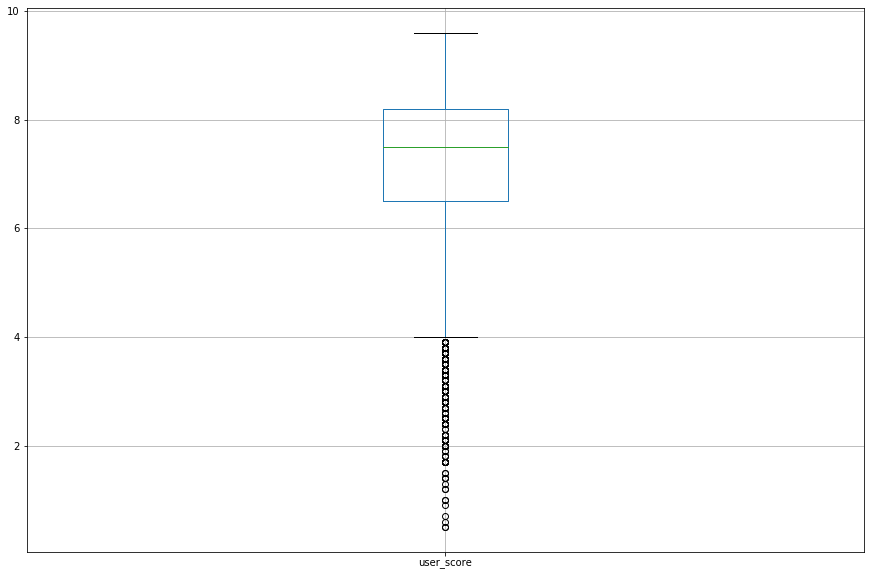

In [65]:
df_outliers.boxplot('user_score')

Нижний «ус» в районе 4 баллов, а верхний заканчивается около 9. Как и в случае с оценками критиков - Ни одна игра не получила 0 или 10 баллов. И также есть немногочисленные выбросы ниже 4 баллов, которые оказывают влияние на среднее - медиана ползет вверх.

&#9889; **Вывод:** 

1. В датасете есть выбросы и самые серьезные в показателях продаж,
2. В данном случае, особенности исследуемого являния в том, что выбросы для в данном случае играют существенную роль в сути явления: есть игры, которые продаются больше других как в силу исторических особенностей (эпоха игровых автоматов, приставок ZX Spectrum и Atari 2600 - долгое время игр было попросту мало), так и в силу особенностей рынка, на котором как и на рынке киноиндустрии, есть крайне успешные игры-блокбастеры и игры-франшизы, производство которых стоит дороже других, но которые и продаются больше других,
3. Поэтому выбросы будут сохранены для целей исследования.

[В оглавление](#TOC)

## **Вывод:** <a class="anchor" id="2_conclusion"></a>

1. Избавились от двух строк с пропущенным наименованием и жанром - 2 из 16 715 (менее 1 %),
2. Избавились от 269 из 16 715 (1.5 %) строк в которых отсутствовал год выпуска.
3. В столбце user_score 6 701‬ из 16 715 (40 %) пропусков заполнили плейсхолдером "-1".
4. В столбце сritic_score 8 578‬ из 16 715 (51 %) пропусков заполнили плейсхолдером "-1".
5. В столбце rating 6 766 из 16 715 (40 %) пропусков заполнили плейсхолдером "ne" - Not Evaluated.
6. Приведен к целочисленному типу столбец с годом выпуска, поскольку года считаются в целых числах (но без конвертации в дату - за отсутствием потребности) 
7. Изменен тип данных на вещественный в столбце с оценками пользователей - поскольку оценки расчитаны с округлением до одного знака после запятой.
8. В датасете сохранены выбросы, поскольку являются важной частью сути явления.

[В оглавление](#TOC)

# III. Анализ данных <a class="anchor" id="3"></a>
***

## 1) Что означает 'tbd' в столбце с оценкой пользователя <a class="anchor" id="3_1"></a>

**Ранее значение 'tbd' было заменено на цифровой плейсхолдер "-1".**

**Значение "tbd" в датасете означает - буквально - "будет определено". Поскольку оценки пользователей и критиков получены с сайта https://www.metacritic.com - логично обратиться за разъяснениями к первоисточнику.**

> "[WHAT DOES "TBD" MEAN?](https://www.metacritic.com/faq#item13)
To Be Determined.

> To help ensure that METASCORES accurately reflect the reviews given by critics for any particular movie, game, television show or album, we do not display a METASCORE for those items that do not have at least four (4) reviews in our database. Once this minimum number of reviews is reached, the METASCORE will display."

&#9889; **Вывод:** значение "tbd" означает, что в базе данных www.metacritic.com содержится менее четырех отзывов об игре.

[В оглавление](#TOC)

## 2) Подготовим  алгоритм k близжайших соседей для предсказания оценок критиков и пользовательских оценок <a class="anchor" id="3_2"></a>

### - описание алгоритма

k ближайших соседей или K-Nearest Neighbors (KNN) - алгоритм классификации, главная идея которого заключается в том, что объекты с похожими свойствами имеют тенденцию попадать в одни и те же категории.

Если представить себе точечный график на котором два вида точек - красные и синие - обозначают два различных класса. Затем на график добавляют новую белую точку, которая требует классификации - красная она или белая. 

Для этого нужно выяснить растояние до близжайших точек - красных или синих. И классифицировать новую белую точку в зависимости от того к какому классу относится большинство его соседей.

[Самый простой способ вычислить расстояние между двумя точками - посчитать расстояние по теореме Пифагора.](https://ru.wikipedia.org/wiki/Евклидова_метрик).

Следовательно, если из пяти близжайших соседей нашей белой точки - три красных, то алгоритм kNN классифицирует белую точку как красную.

Для нашей задачи важно то, что алгоритм kNN применим не только для классификации, но и для регрессии: просто вместо классификации мы будем высчитывать среднее близжайших от точки соседей. 

Например, у нас есть компьютерная игра без оценки, чьи близжайшие сосседи получили от критиков 70 баллов, 95 баллов и 68 баллов. Тогда алгоритм предскажет вероятную оценку игры в 78 баллов.

Эта оценка уже что-то, но нужно пойти еще дальше и вычислить [средневзвешанное по расстоянию среднее](http://www.machinelearning.ru/wiki/index.php?title=%D0%A1%D1%80%D0%B5%D0%B4%D0%BD%D0%B5%D0%B5%2C_%D0%B2%D0%B7%D0%B2%D0%B5%D1%88%D0%B5%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BF%D0%BE_%D1%80%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D1%8E) на основе того насколько близок каждый из соседей к искомой точке, поскольку близость к конкретной точке играет существенную роль: для этого мы сложим результат деления оценки каждой игры на расстояние до искомой точки, а затем разделим полученную сумму на сумму единиц разделенных на каждую из дистанций.

### - подготовим датасет

Сделаем копию датасета

In [66]:
df_knn = df.copy()

В датасете есть категориальные атрибуты - платформа, рейтинг и жанр, которые необходимо закодировать, чтобы использовать при расчете. Используем метод .get_dummies()

In [67]:
platform_dummies = pd.get_dummies(df_knn.platform)

In [68]:
genre_dummies = pd.get_dummies(df_knn.genre)

In [69]:
rating_dummies = pd.get_dummies(df_knn.rating)

Объединим полученные таблицы с закодированными значениями с помощью метода join()

In [70]:
dummies = platform_dummies.join(rating_dummies).join(genre_dummies)

Присоединим таблицу с закодированными значениями к копии датасета с помощью метода concat() и выведем первые пять строк таблицы

In [71]:
df_knn = pd.concat([df_knn, dummies], axis=1)

In [72]:
df_knn.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,...,fighting,misc,platform,puzzle,racing,role-playing,shooter,simulation,sports,strategy
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,...,0,0,0,0,0,0,0,0,1,0
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1.0,-1.0,...,0,0,1,0,0,0,0,0,0,0
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,...,0,0,0,0,1,0,0,0,0,0
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,...,0,0,0,0,0,0,0,0,1,0
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1.0,-1.0,...,0,0,0,0,0,1,0,0,0,0


Сделаем копию с категориальными данными, чтобы потом проверить результат: только для ознакомления с содержимым, тут не будет масштабирования данных. Удобно посмотреть карточку игры.

In [73]:
df_knn_clean_labeled = df_knn.query('critic_score  != -1')

In [74]:
df_knn_na_labeled = df_knn.query('critic_score == -1')

Датасет из которого мы будем выбирать после обучения модели случайные игры

In [76]:
df_knn_without_scores = df_knn.query('critic_score == -1')

Подготовим датасет c которым будем работать.

Датасет для обучения и тренировки модели

In [77]:
df_knn_with_scores = df_knn.copy()
df_knn_with_scores = df_knn_with_scores.query('critic_score  != -1')
df_knn_with_scores.drop(['name', 'platform', 'genre', 'critic_score', 'user_score', 'rating'], axis = 1, inplace = True)

In [78]:
x = df_knn_with_scores

In [79]:
y = df_knn.query('critic_score  != -1').critic_score

In [80]:
df_knn_with_scores.shape, y.shape

((7983, 57), (7983,))

Разделим выборку на обучающую и тестовую с помощью функции train_test_split в соотношениях 0.8 и 0.2.

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=42)

Применяем масштабирование к тренировочным данным:

In [82]:
scaler = MinMaxScaler()

In [83]:
train_features = scaler.fit_transform(x_train)

Применяем масштабирование к тестовым данным:

In [84]:
test_features = scaler.transform(x_test)

Превращаем оценки в одномерную матрицу

In [85]:
score_train = np.ravel(y_train)
score_test = np.ravel(y_test)

Создаем модель kNN регрессии с указанием использовать средневзвешанное по расстоянию среднее:

In [86]:
regressor = knnr(n_neighbors=5, weights='distance')

Обучаем модель, передаем модели тренировочные данные

In [87]:
train_features.shape, score_train.shape

((6386, 57), (6386,))

In [88]:
regressor.fit(train_features, score_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='distance')

Проверяем модель на тестовой выборке

In [89]:
y_predict = regressor.predict(test_features)

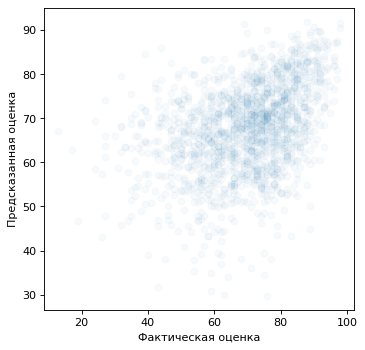

In [90]:
plt.figure(figsize=(5,5), dpi= 80)
plt.scatter(score_test, y_predict, alpha = 0.03)
plt.ylabel('Предсказанная оценка')
plt.xlabel('Фактическая оценка')
plt.show()

Выберем случайную строку с ценой и пометим соответствующие ей характеристики, чтобы проверить как модель справится

Оценка, которую модель будет пытаться предсказать

In [91]:
score_train[1322]

67.0

Помеченные параметры по которым модель будет предсказывать оценку, вложим строку в список.

In [92]:
labeled = train_features[1322]
lreshaped = [labeled]

Передадим помеченную строку модели и выведем на экран предсказанную моделью оценку.

In [1]:
labeled_score = regressor.predict(lreshaped)
print('\nПредсказанная оценка ' + str(round(float(labeled_score), 2)))

NameError: name 'regressor' is not defined

Проверим модель для обучающих и тренировочных данных с помощью метода .score()

Для обучающих данных

In [94]:
regressor.score(train_features, score_train)

0.9761778106794599

Для тестовых данных

In [95]:
regressor.score(test_features, score_test)

0.035994495287317685

SMAPE

In [96]:
smape = explorer.smape(score_test, y_predict)
smape

7.912236456218922

Следовательно, точность прогноза в процентах по метрике SMAPE:

In [97]:
100 - smape

92.08776354378108

Выведем метрику MAPE - cредний процент отклонения, ошибку прогнозирования

In [98]:
mape = explorer.mape(score_test, y_predict)
mape

12.87546952753745

Следовательно, точность прогноза в процентах по метрике MAPE:

In [99]:
100 - mape

87.12453047246255

&#9889; **Вывод:** судя по совпадениям предсказанных и реальных оценок - алгоритм учитывает вес каждого из соседей, а значит работает как и задумано.

### - выберем несколько случайных игр из выборки с пропущенными оценками и протестируем алгоритм

In [100]:
df_knn_without_scores.drop(['name', 'platform', 'genre', 'critic_score', 'user_score', 'rating'], axis = 1, inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [101]:
df_knn_wos = scaler.transform(df_knn_without_scores)

In [102]:
df_knn_wos.shape, df_knn_na_labeled.shape

((8461, 57), (8461, 64))

#### **burnout paradise: the ultimate box**

In [103]:
df_knn_na_labeled.iloc[6654,:12]

name               burnout paradise: the ultimate box
platform                                         x360
year_of_release                                  2009
genre                                          racing
na_sales                                            0
eu_sales                                         0.03
jp_sales                                            0
other_sales                                         0
critic_score                                       -1
user_score                                         -1
rating                                             ne
total_sales                                      0.03
Name: 14172, dtype: object

In [104]:
lrlabeled = [df_knn_wos[6654]]

In [105]:
regressor.predict(lrlabeled)

array([67.99990989])

Предсказанная оценка - 67, оценка на metacritic.com - [88](https://www.metacritic.com/game/xbox-360/burnout-paradise).

#### **super mario bros.**

In [106]:
df_knn_na_labeled.iloc[0,:12]

name               super mario bros.
platform                         nes
year_of_release                 1985
genre                       platform
na_sales                       29.08
eu_sales                        3.58
jp_sales                        6.81
other_sales                     0.77
critic_score                      -1
user_score                        -1
rating                            ne
total_sales                    47.82
Name: 1, dtype: object

In [107]:
lrlabeled = [df_knn_wos[0]]

In [108]:
regressor.predict(lrlabeled)

array([76.26261556])

Предсказанная оценка - 76, оценка на metacritic.com отсутствует. Переиздание по оценке www.gamerankings.com получило  - [80](https://www.gamerankings.com/gba/919774-classic-nes-series-super-mario-bros/index.html).

#### **pokemon ruby/pokemon sapphire**

In [109]:
df_knn_na_labeled.iloc[10,:12]

name               pokemon ruby/pokemon sapphire
platform                                     gba
year_of_release                             2002
genre                               role-playing
na_sales                                    6.06
eu_sales                                     3.9
jp_sales                                    5.38
other_sales                                  0.5
critic_score                                  -1
user_score                                    -1
rating                                        ne
total_sales                                21.72
Name: 25, dtype: object

In [110]:
lrlabeled = [df_knn_wos[10]]

In [111]:
regressor.predict(lrlabeled)

array([80.37568467])

Предсказанная оценка - 80, оценка на metacritic.com для [pokemon sapphire](https://www.metacritic.com/game/3ds/pokemon-alpha-sapphire) и [pokemon ruby](https://www.metacritic.com/game/game-boy-advance/pokemon-ruby-version) - 82.

#### **cabela's dangerous hunts 2009**

In [112]:
df_knn_na_labeled.iloc[1867,:12]

name               cabela's dangerous hunts 2009
platform                                     wii
year_of_release                             2008
genre                                     sports
na_sales                                    0.35
eu_sales                                       0
jp_sales                                       0
other_sales                                 0.03
critic_score                                  -1
user_score                                   4.5
rating                                         t
total_sales                                 0.41
Name: 5045, dtype: object

In [113]:
lrlabeled = [df_knn_wos[1867]]

In [114]:
regressor.predict(lrlabeled)

array([40.61883626])

Предсказанная оценка - 41, оценка на metacritic.com от ign - [48](https://www.metacritic.com/game/wii/cabelas-dangerous-hunts-2009)

#### **disney's planes**

In [115]:
df_knn_na_labeled.iloc[3777,:12]

name               disney's planes
platform                       wii
year_of_release               2013
genre                   simulation
na_sales                      0.07
eu_sales                      0.06
jp_sales                         0
other_sales                   0.01
critic_score                    -1
user_score                      -1
rating                           e
total_sales                   0.15
Name: 9110, dtype: object

In [116]:
lrlabeled = [df_knn_wos[3777]]

In [117]:
regressor.predict(lrlabeled)

array([58.95617668])

Предсказанная оценка - 59, оценка на metacritic.com - [51](https://www.metacritic.com/game/wii-u/disney-planes)

#### **cake mania: in the mix!**

In [118]:
df_knn_na_labeled.iloc[3654,:12]

name               cake mania: in the mix!
platform                               wii
year_of_release                       2008
genre                               puzzle
na_sales                              0.14
eu_sales                                 0
jp_sales                                 0
other_sales                           0.01
critic_score                            -1
user_score                              -1
rating                                  ne
total_sales                           0.16
Name: 8854, dtype: object

In [119]:
lrlabeled = [df_knn_wos[3654]]

In [120]:
regressor.predict(lrlabeled)

array([57.99999967])

Предсказанная оценка - 58, оценка на www.gamerankings.com - [55](https://www.gamerankings.com/wii/944499-cake-mania-in-the-mix/index.html)

#### cooking mama 3: shop & chop

In [121]:
df_knn_na_labeled.iloc[355,:12]

name               cooking mama 3: shop & chop
platform                                    ds
year_of_release                           2009
genre                               simulation
na_sales                                  0.79
eu_sales                                  0.65
jp_sales                                  0.08
other_sales                               0.17
critic_score                                -1
user_score                                  -1
rating                                      ne
total_sales                               1.94
Name: 1067, dtype: object

In [122]:
lrlabeled = [df_knn_wos[355]]

In [123]:
regressor.predict(lrlabeled)

array([63.20019195])

Предсказанная оценка - 63, оценка на www.gamerankings.com - [68](https://www.gamerankings.com/ds/960496-cooking-mama-3-shop-and-chop/index.html)

#### 3xtreme

In [124]:
df_knn_na_labeled.iloc[777,:12]

name               3xtreme
platform                ps
year_of_release       1999
genre               action
na_sales               0.5
eu_sales              0.34
jp_sales                 0
other_sales           0.06
critic_score            -1
user_score              -1
rating                  ne
total_sales           0.96
Name: 2304, dtype: object

In [125]:
lrlabeled = [df_knn_wos[777]]

In [126]:
regressor.predict(lrlabeled)

array([66.80043755])

Предсказанная оценка - 66, оценка на www.gamerankings.com - [40](https://www.gamerankings.com/ps/196517-3xtreme/index.html)

#### mario & luigi: superstar saga

In [127]:
df_knn_na_labeled.iloc[236,:12]

name               mario & luigi: superstar saga
platform                                     gba
year_of_release                             2003
genre                               role-playing
na_sales                                    1.48
eu_sales                                    0.17
jp_sales                                    0.47
other_sales                                 0.06
critic_score                                  -1
user_score                                    -1
rating                                        ne
total_sales                                 2.71
Name: 755, dtype: object

In [128]:
lrlabeled = [df_knn_wos[236]]

In [129]:
regressor.predict(lrlabeled)

array([79.39901098])

Предсказанная оценка - 79, оценка на www.gamerankings.com - [90](https://www.gamerankings.com/gba/914980-mario-and-luigi-superstar-saga/index.html)

#### tomb raider iii: adventures of lara croft

In [130]:
df_knn_na_labeled.iloc[1111,:12]

name               tomb raider iii: adventures of lara croft
platform                                                  pc
year_of_release                                         1998
genre                                                 action
na_sales                                                0.59
eu_sales                                                0.03
jp_sales                                                   0
other_sales                                                0
critic_score                                              -1
user_score                                               8.2
rating                                                     t
total_sales                                             0.62
Name: 3258, dtype: object

In [131]:
lrlabeled = [df_knn_wos[1111]]

In [132]:
regressor.predict(lrlabeled)

array([80.11689215])

Предсказанная оценка - 80, оценка на www.gamerankings.com - [73](https://www.gamerankings.com/pc/71538-tomb-raider-iii-adventures-of-lara-croft/index.html)

&#9889; **Вывод:** алгоритм работает.

[В оглавление](#TOC)

## 3) Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
<a class="anchor" id="3_3"></a>

In [133]:
games_released_per_year = df.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')

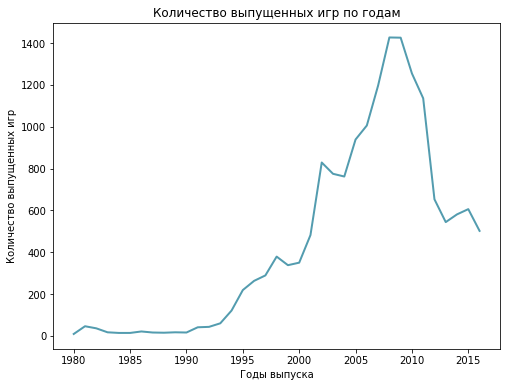

In [134]:
explorer.lineplot(games_released_per_year.index, games_released_per_year.values, x_label="Годы выпуска", y_label="Количество выпущенных игр", title="Количество выпущенных игр по годам")

In [135]:
games_released_per_year.sort_values(by = 'name', ascending = False).head(16)

,name
year_of_release,
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136
2006,1006
2005,939
2002,829
2003,775


&#9889; **Вывод:** на протяжении десятилетия с 1980 до 1990 года - основными "платформами" распространения игр являлись игровые автоматы; в этот период появляются домашние компьютеры и приставки, но в масштабах рынка это оказывает незначительное влияние - и игр выпускают немного, что нашло отражение в датасете. Начиная с девяностых происходит взрывной рост рынка компьютерных игр, в первую очередь, из-за технологического развития, в том числе появление интернета. Вплоть до появления первого айфона рынок компьютерных и консольных игр показывал рост, но уже к 2016 году объем выпуска снизился втрое, что впрочем не отражает реального положения дел в индустрии, поскольку кроме консольных и компьютерных игр теперь крайне существенную роль играет рынок мобильных игр для iOS и Android. **В целом, представляется, что показатели за все периоды представляют только исторический интерес, принимая во внимание цели исследования. Для интернет-магазина компьютерных игр, в теории есть возможность продавать хоть все игры выпущенные за весь период.**

https://ru.wikipedia.org/wiki/Индустрия_компьютерных_игр#История

[В оглавление](#TOC)

## 4) Как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы? <a class="anchor" id="3_4"></a>

Сгруппируем датасет по году выпуска и платформе, подсчитаем количество продаж

In [136]:
df_platform = df.groupby(['year_of_release','platform'])['total_sales'].count().reset_index()

Поскольку нас интересуют только набольшие продажи в каждом из годов, то отсортируем полученную таблицу по продажам, а затем избавимся от дубликатов в столбце с годами выпуска с условием сохранения первого встреченного дубликата. Как следствие получим таблицу в которой каждому году соответсвует только одна платформа с самыми высокими продажами

In [137]:
df_platform = df_platform.sort_values(by = 'total_sales', 
                                      ascending=False).drop_duplicates(subset = ['year_of_release'], keep='first')

С помощью сводной таблицы посмотрим какие из платформ становились первыми по годам

In [138]:
platform_long_life = df_platform.pivot_table(index = ['year_of_release', 'platform'], values = 'total_sales', aggfunc = 'count')
pll_first_18 = platform_long_life.head(18)
pll_last_18 =platform_long_life.tail(18)
explorer.Display('pll_first_18', 'pll_last_18')

,,total_sales
year_of_release,platform,
1980,2600,1
1981,2600,1
1982,2600,1
1983,2600,1
1984,nes,1
1985,nes,1
1986,nes,1
1987,nes,1
1988,nes,1


Выделяются четкие периоды доминирования платформ, за исключения 1989 года, когда ГеймБой стал лидером. Поскольку платформы доминируют хронологически, чтобы выделить характерный период доминирования платформы избавимся сначала отсортируем таблицу по годам, затем избавимся от информации о годах, в которых платформы занимали первые места, тем самым не нарушив последовательность.

In [139]:
df_platform = df_platform.sort_values(by = 'year_of_release')
platform_domination = df_platform.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'count')
platform_domination

,total_sales
platform,
2600,4
ds,4
gb,1
nes,6
ps,6
ps2,6
ps3,4
ps4,2
snes,4


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

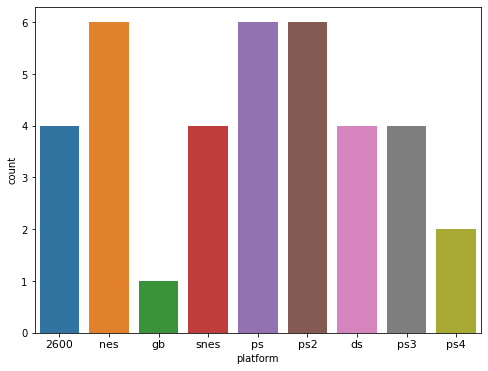

In [140]:
plt.rcParams["figure.figsize"] = (8, 6)
ax = sns.countplot(df_platform.platform)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)
plt.xticks()

Если взять в расчет, что ds - это [Нинтендо DS](#https://ru.wikipedia.org/wiki/Nintendo_DS), которая является продолжателем ГеймБоя, а также принять во внимание, что к декабрю 2020 года подойдет к концу эпоха Плейстейшен 4, на смену которому будет выпущен уже анонсированный [Плейстейшен 5](#https://rg.ru/2019/10/21/playstation-5-foto-cena-data-vyhoda-i-vse-chto-izvestno-na-dannyj-moment.html), то **средний срок доминирования платформы - четрые с половиной года (хотя в нашем датасете 2016 год - так что средний расчет дает 4 года).**

Визуализируем результат: сделаем год выпуска индексом, построим столбчатый график.

In [141]:
df_platform.set_index('year_of_release', inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]), <a list of 37 Text xticklabel objects>)

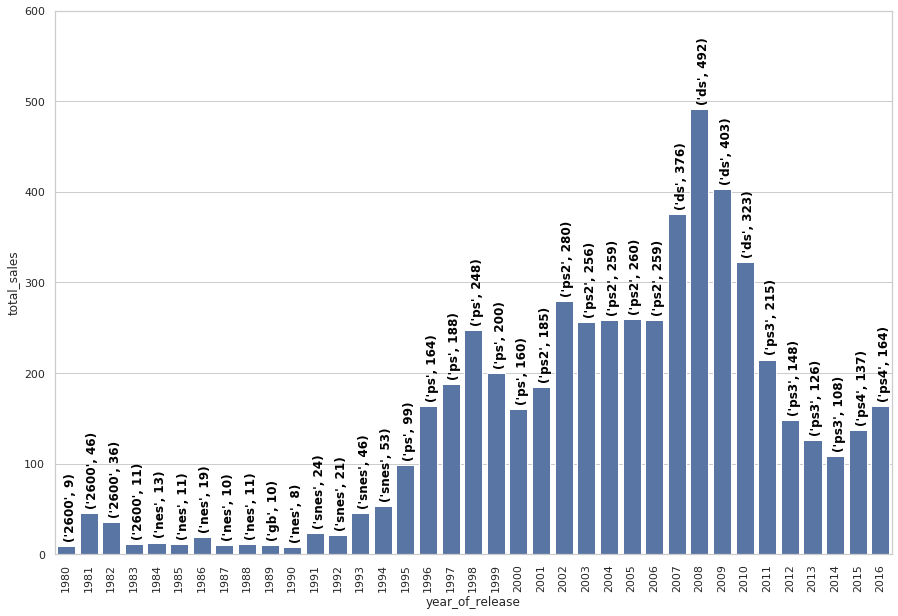

In [142]:
sns.set(style='whitegrid')

plt.rcParams['figure.figsize'] = (15, 10)

plt.ylim(0,600)

sns.barplot(x=df_platform.index, y='total_sales', data=df_platform,
            label="Total Sales", color='b')

for i, p in enumerate(zip(df_platform.platform, df_platform['total_sales'])):
    plt.text(s=p, x=i-0.1 , y=p[1]+5, fontweight='bold', color='black', rotation = 'vertical', verticalalignment = 'bottom')
    
plt.xticks(rotation = 90)

&#9889; **Вывод:** **характерный срок доминирования - от четырех до пяти лет**, после чего платформу обновляют. В восьмидесятых и девяностых смена доминирующей платформы могла быть связана с принципиально новым витком технологий и ростом производительности, которые глобально меняли возможности платформ. В современный период - смена, по всей видимости, привязана к запланированному деловому циклу, что объясняет почему примерно каждые четыре - пять лет Сони выпускает новую версию приставки.

[В оглавление](#TOC)

## 5) Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ. <a class="anchor" id="3_5"></a>

Сделаем срез по году выпуска с 2011 года (поскольку "актуальный" для нас год - 2016), чтобы оценить в перспективе рост или падение продаж

In [143]:
df_platform_actual = df.query('year_of_release > 2010')

Поскольку задача стоит в том, чтобы определить какие платформы лидируют продажам, а также оценить растут или падают продажи - то есть нас интересует тенденция - визуализируем продажи по платформам

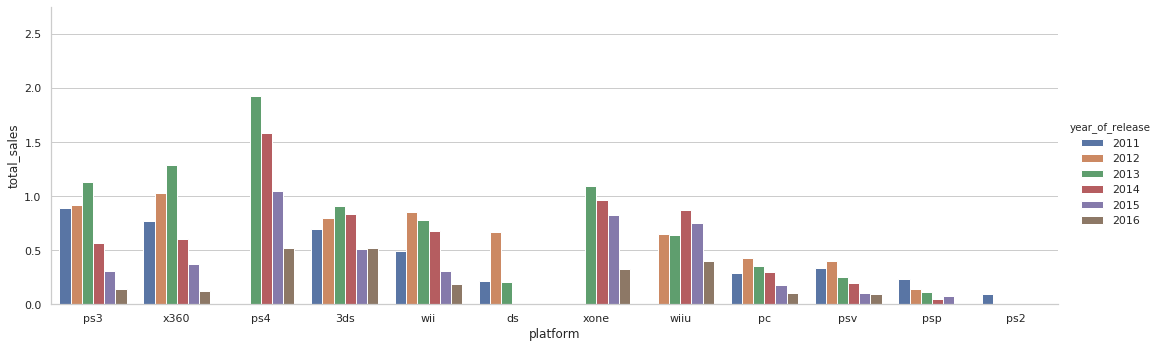

In [144]:
sns.set(style='whitegrid')

sns.catplot(x='platform', y='total_sales', hue='year_of_release', kind='bar', errwidth=0, 
            data=df_platform_actual, height=5, aspect=3)

Общая тенеденция очевидна - продажи падают по всем платформам. В пятилений период рынок покинули PS2 (2011), Nintendo DS (2013), PSP (2015). К 2016 году остаются - PS3 и PS4, Xbox360, Xbox One, PS Vita, Nintendo 3DS, Wii и Wii U. Сократим выборку до трех лет.

In [145]:
df_platform_actual = df.query('year_of_release > 2013')

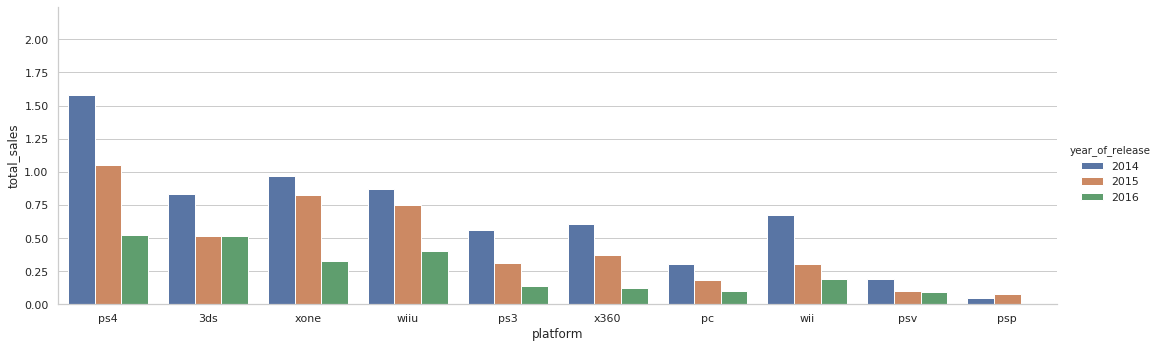

In [146]:
explorer.sns_catplot(df_platform_actual, 'platform', 'total_sales', 'year_of_release')

&#9889; **Вывод:** исходя из представленных платформ в 2017 году больше всего игр будет продаваться для платформ PS4, Nintendo 3DS, Xbox One и Wii U (либо для преемников данных платформ).

[В оглавление](#TOC)

## 6) Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? <a class="anchor" id="3_6"></a>

1. Изначальная задача предполагает построение графика «ящик с усами» по глобальным продажам каждой игры. В датасете более одиннадцати тысяч уникальных игр, поэтому выполнение задачи представляется исключительно ресурсозатратным. Задача противоречит смыслу исследования, поскольку нас интересуют общие продажи по платформам, а не продажи конкретных игр в зависимости от платформы. Кроме того, при этом построение ящика с усами для глобальных продаж конкретной игры не позволят установить общее положение дел на рынке, для этого все равно потребуется аггрегировать данные.


2. Поэтому, поскольку задачу не уточнить у заказчика исследования - самостоятельно переформулируем задачу: **"Постройте график «ящик с усами» по глобальным продажам игр и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах?"**

Сделаем срез по актуальному периоду

In [147]:
describe_tp = df.query('year_of_release > 2014')

Определим лидеров продаж в полученной выборке

In [148]:
top_platforms = df.query('year_of_release > 2014').platform.value_counts().head(5).index.values

Построим график ящик с усами по глобальным продажам игр и разбивкой по платформам

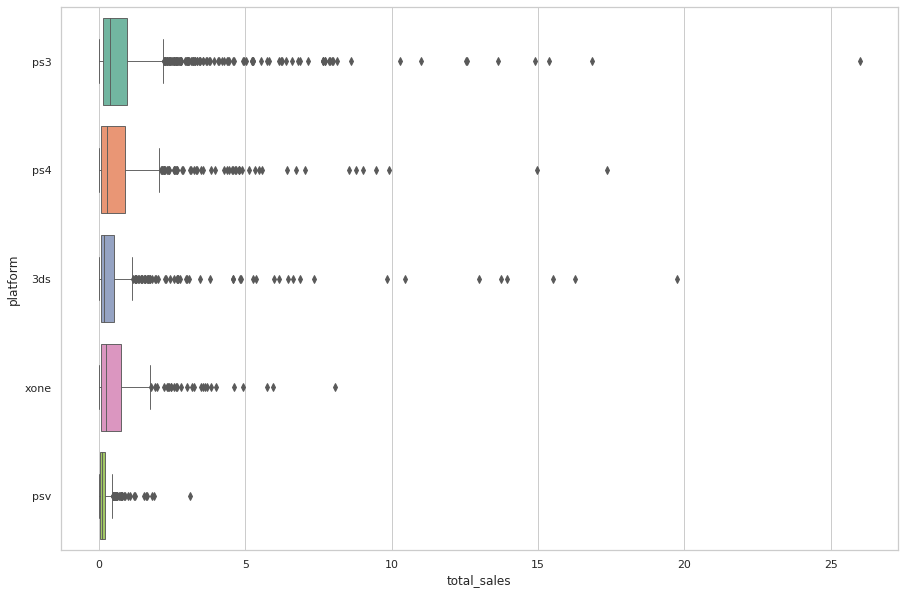

In [149]:
f, ax = plt.subplots(figsize=(15, 10))

sns.boxplot(y="platform", x="total_sales", data=df[df.platform.isin(top_platforms)], linewidth=0.9, orient="h", palette="Set2")

&#9889; **Вывод:** 
1. Выделяются три группы платформ: больше всего продажи игр для двух поколений флагманских приставок от Сони, далее идет Xbox One и Nintendo 3DS, и замыкает, с сильным отставанием, мобильная платформа PS Vita. 
2. Визуально средние продажи приставок от Сони и Майкрософт не сильно отличаются друг от друга, хотя и продажи для Xbox One ниже. Средние продажи игр для мобильных консолей Nintendo 3DS и PS Vita сильно отстают от приставок, и сильно различаются между собой.  

[В оглавление](#TOC)

## 7) Проведем дисперсионный анализ для уточнения ответа на предыдущий вопрос<a class="anchor" id="3_7"></a>

Дисперсионный анализ — метод в математической статистике, направленный на поиск зависимостей в экспериментальных данных путём исследования значимости различий в средних значениях. В отличие от t-критерия, позволяет сравнивать средние значения трёх и более групп. Разработан Робертом Фишером для анализа результатов экспериментальных исследований. В литературе также встречается обозначение [ANOVA (от англ. ANalysis Of VAriance)](#https://en.wikipedia.org/wiki/Analysis_of_variance)

#### - **Соберем группы в отношении которых будем проводить анализ**

In [150]:
ps3 = describe_tp.query('platform == "ps3"').total_sales
ps4 = describe_tp.query('platform == "ps4"').total_sales
ds = describe_tp.query('platform == "3ds"').total_sales
xone = describe_tp.query('platform == "xone"').total_sales
psv = describe_tp.query('platform == "psv"').total_sales

#### - **Сформулируем нулевую и альтернативную гипотезы**

1. Нулевую гипотезу, которую проверяет тест, сформулируем так: "Среднее значение продаж игр на платформах PS3, PS4, Nintendo 3DS, Xbox One, PS Vita одинаково".

2. Альтернативную гипотезу, соответственно, сформулируем так: "Не все средние значения продаж  игр на платформах PS3, PS4, Nintendo 3DS, Xbox One, PS Vita одинаковы, то есть имеются, по крайней мере, две группы, отличающиеся средними значениями продаж".

#### - Примем уровень значимости в 5%.

In [151]:
alpha =0.05

#### - Проведем тест и получим p-значение

In [152]:
fstat, pval = f_oneway(ps3, ps4, ds, xone, psv)
pval

3.489679834133951e-08

#### - Сравним p-значение с уровнем значимости

In [153]:
pval < alpha

True

&#9889; **Вывод:** исходя из представленных данных, на уровне значимости 5% - есть основания отвергнуть нулевую гипотезу в пользу альтернативы. Не все средние значения продаж игр на платформах PS3, PS4, Nintendo 3DS, Xbox One, PS Vita одинаковы, то есть имеются, по крайней мере, две группы, отличающиеся средними значениями продаж.

[В оглавление](#TOC)

## 8) Выясним какие пары средних статистически значимо различаются между собой <a class="anchor" id="3_8"></a>

После ANOVA необходимо выполнить [post hoc анализ](#https://en.wikipedia.org/wiki/Post_hoc_analysis), чтобы выяснить, между какими группами существуют статистически значимые различия. Для этого проведем [HSD тест Тьюки](#https://en.wikipedia.org/wiki/Tukey's_range_test).

#### - Объединим все наблюдения о продажах в отношении приставок в список observations и создадим ярлыки для вложенных в список наблюдений.

In [154]:
observations = np.concatenate([ps3, ps4, ds, xone, psv])
labels = ['ps3'] * len(ps3) + ['ps4'] * len(ps4) + ['ds'] * len(ds) + ['xone'] * len(xone) + ['psv'] * len(psv)

#### - Сформулируем нулевую и альтернативную гипотезы

1. Нулевую гипотезу, которую проверяет тест, сформулируем так: "Среднее значение продаж игр на платформах PS3, PS4, Nintendo 3DS, Xbox One, PS Vita для каждой из пар одинаковы".

2. Альтернативную гипотезу, соответственно, сформулируем так: "Среднее значение продаж игр на платформах PS3, PS4, Nintendo 3DS, Xbox One, PS Vita для каждой из пар различается".

#### - Примем уровень значимости равным 5 %

In [155]:
alpha = 0.05

#### - Проведем тест

In [156]:
tukey_results = pairwise_tukeyhsd(observations, labels, alpha)

#### - Выведем результат на экран

In [157]:
print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    ds    ps3   -0.265 0.4229 -0.6859  0.1558  False
    ds    ps4   0.2443 0.2883 -0.0969  0.5854  False
    ds    psv  -0.4168 0.0174 -0.7852 -0.0485   True
    ds   xone   0.0477    0.9 -0.3329  0.4283  False
   ps3    ps4   0.5093 0.0013  0.1464  0.8722   True
   ps3    psv  -0.1518 0.7993 -0.5403  0.2368  False
   ps3   xone   0.3128 0.2056 -0.0874   0.713  False
   ps4    psv  -0.6611  0.001 -0.9615 -0.3607   True
   ps4   xone  -0.1965  0.434 -0.5118  0.1188  False
   psv   xone   0.4646 0.0022    0.12  0.8091   True
----------------------------------------------------


&#9889; **Вывод:** 

1. Исходя из представленных данных, на уровне значимости 5% - есть основания отвергнуть нулевую гипотезу в пользу альтернативы. Среднее значение продаж игр на платформах PS3, PS4, Nintendo 3DS, Xbox One, PS Vita для каждой из пар различается.


2. Средние значения продаж игр различаются - на уровне значимости 5% - на платформах:
    - 1) Nintendo 3DS и PS Vita,
    - 2) PS3 и PS4,
    - 3) PS4 и PS Vita,
    - 4) PS Vita и Xbox One.


3. Средние значения продаж игр одинаковы, в том числе, на платформах PS4 и Xbox One, а также на платформе PS3 и Xbox One, при том что средние продажи PS3 и PS4 статистически значимо различаются на уровне значимости 5%</font>.


[В оглавление](#TOC)

## 9) Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. <a class="anchor" id="3_9"></a>

#### - Выведем на экран доминирующую по состоянию на 2016 год платформу

In [158]:
top_platforms[0]

'ps4'

В 2016 году доминирует PS4 - самая популярная платформа.

#### - Сделаем срез по платформе PS4 и выведем основные статистики

In [159]:
platform_scores = df.query('platform == "ps4" and critic_score != -1 and user_score != -1')

In [160]:
platform_scores.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,2015.056225,0.339197,0.451566,0.037871,0.152369,72.132530,6.749799,1.171245
std,0.914076,0.566725,0.885507,0.068243,0.257127,12.550965,1.455693,1.943826
min,2013.000000,0.000000,0.000000,0.000000,0.000000,19.000000,1.500000,0.010000
25%,2014.000000,0.020000,0.030000,0.000000,0.010000,66.000000,6.100000,0.100000
50%,2015.000000,0.090000,0.120000,0.010000,0.040000,74.000000,7.000000,0.370000
75%,2016.000000,0.390000,0.450000,0.050000,0.170000,80.000000,7.800000,1.310000
max,2016.000000,3.960000,6.310000,0.490000,1.970000,97.000000,9.200000,14.970000


Средняя оценка игр критиков - 72, пользователей - 7 из 10. Оба значения близки к медиане. В целом и пользователи и критики благосклонно настроены к играм на данной платформе. Есть игра, которую к 2016 году продали почти  15 миллионах копиях. Выведем на экран наименование.

In [161]:
platform_scores.query('total_sales > 13')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,m,14.97


Ожидаемо - Grand theft auto V.

#### - Построим диаграмму рассеяния чтобы посмотреть зависимость продаж от оценок критиков и пользователей

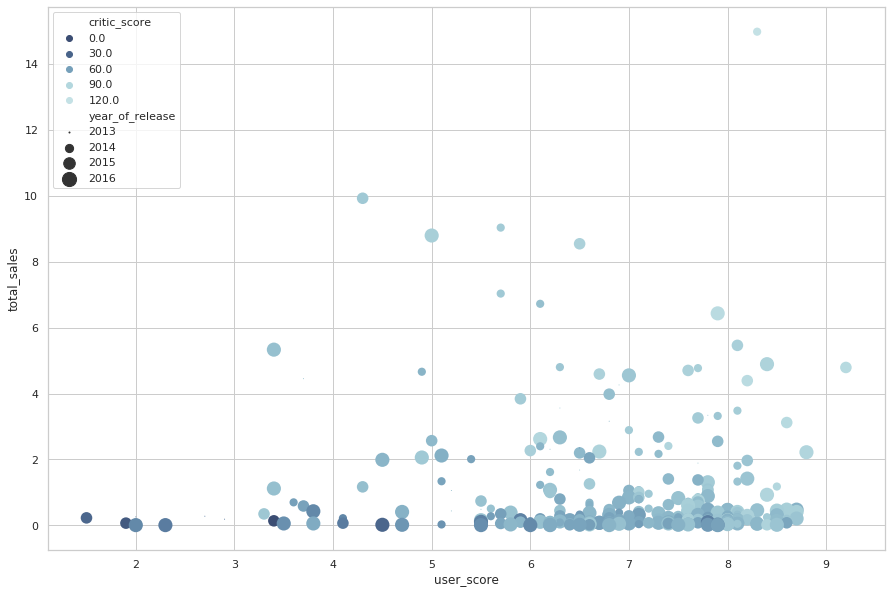

In [162]:
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(15, 10))

sns.scatterplot(ax = ax, x="user_score", y="total_sales",
                palette="ch:r=-.2,d=.3_r",
                hue="critic_score", size="year_of_release",
                sizes=(1, 200), linewidth=0,
                data=platform_scores)

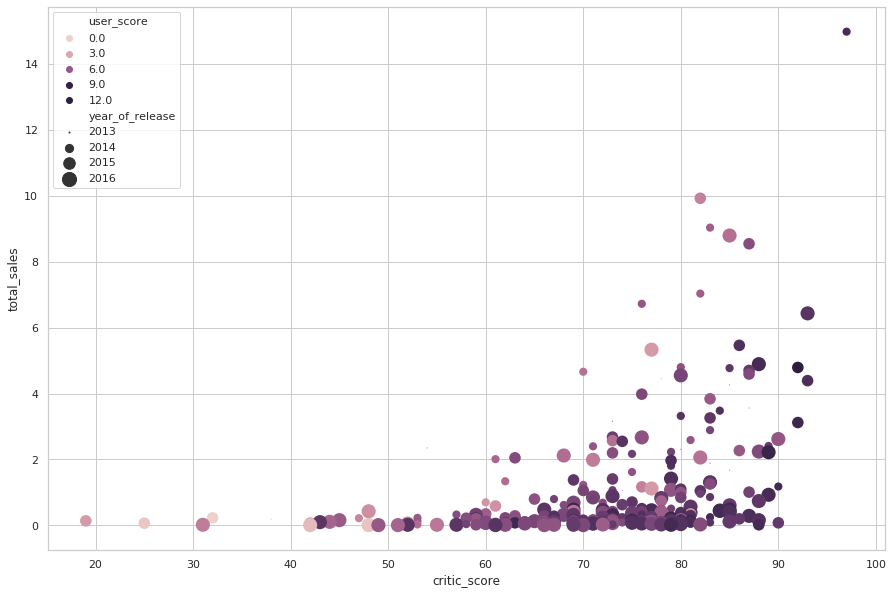

In [163]:
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(15, 10))

sns.scatterplot(ax = ax, x="critic_score", y="total_sales",
                color = 'r',
                hue="user_score", size="year_of_release",
                sizes=(1, 200), linewidth=0,
                data=platform_scores)

**Сформулируем промежуточный вывод:**

1. Чем выше оценки пользователей и критиков, тем выше продажи (и наоборот). 
2. Любопытно, что при этом оценки критиков и пользователей порой сильно расходятся, что на диаграммах отражается в цветовом кодировании точек и визуально выглядит так, словно пользовательская оценка оказывает меньшее влияние. По крайней мере, есть игры которые показывали относительно высокие продажи даже при невысоких пользовательских оценках. Обратное нельзя утвержать об оценках критиков.
3. Очень похоже, что в датасете можно наблюдать проявление "ложного авторитета": оценка журналиста оказывается влиятельнее, чем оценки других пользователей, хотя журналист зачастую занимается рекламой (осознанной или нет).
4. Диаграммы портят выбивающиеся значения. Избавимся от них для большей наглядности.

In [164]:
platform_scores_wo = platform_scores.query('total_sales < 2')

#### - Построим диаграммы рассеяния для датасета без выбросов 

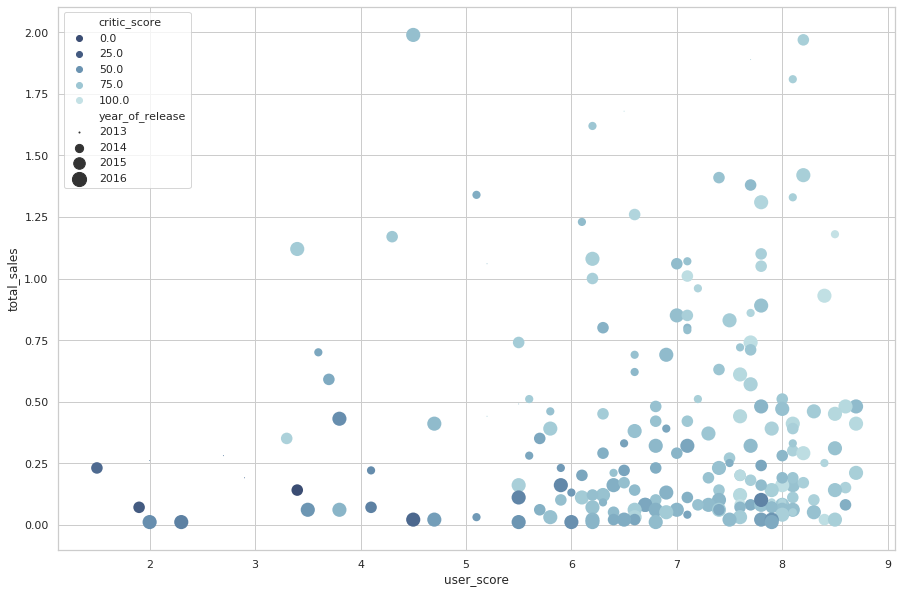

In [165]:
explorer.sns_scatterplot(platform_scores_wo, 'user_score', 'total_sales', 'critic_score', 'year_of_release', True)

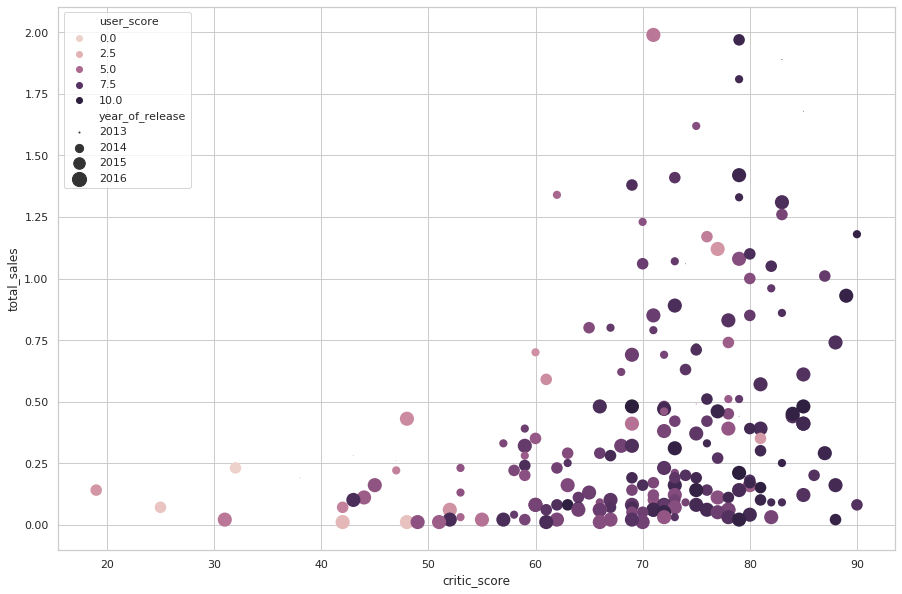

In [166]:
explorer.sns_scatterplot(platform_scores_wo, 'critic_score', 'total_sales', 'user_score', 'year_of_release', False)

#### - Посчитаем корреляцию между отзывами и продажами

In [167]:
explorer.pandahug(platform_scores.corr().total_sales).style.apply(explorer.highlight_sorted_corr)

,total_sales
year_of_release,-0.233537
na_sales,0.896658
eu_sales,0.947901
jp_sales,0.611617
other_sales,0.997205
critic_score,0.409088
user_score,-0.0272883
total_sales,1


&#9889; **Вывод:** 

1. Чем выше оценки пользователей и критиков, тем выше продажи (и наоборот).
2. Пользовательская оценка оказывает меньшее влияние на продажи, чем оценка критков.
3. В датасете наблюдается сильная положительная корреляция между оценкой критиков и продажами (0.41), и, неожиданно, слабая отрицательная корреляция между оценками пользователей и продажами (0.027). Возможно, цена игры влияет на оценку пользователей.

[В оглавление](#TOC)

## 10) Соотнесем выводы о влиянии отзывов пользователей и критиков на продажи внутри одной популярной платформы с продажами игр на других платформах. <a class="anchor" id="3_10"></a>

#### - Выведем на экран все остальные популярные платформы по состоянию на 2016 год платформу

In [168]:
top_platforms[1:]

array(['psv', 'xone', '3ds', 'ps3'], dtype=object)

#### - Сделаем срез по платформе PS4 и выведем основные статистики

In [169]:
platform_scores_not_ps4 = df.query('platform == ["psv", "xone", "3ds", "ps3"] and critic_score != -1 and user_score != -1 and total_sales < 2')

In [170]:
platform_scores_not_ps4.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000
mean,2011.450889,0.217091,0.147250,0.048204,0.058962,69.113190,6.794855,0.578672
std,2.615259,0.213331,0.169239,0.096630,0.063457,13.092916,1.370052,0.487469
min,2006.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.500000,0.010000
25%,2009.000000,0.070000,0.020000,0.000000,0.010000,61.000000,6.100000,0.190000
50%,2011.000000,0.140000,0.080000,0.000000,0.030000,71.000000,7.100000,0.410000
75%,2013.000000,0.310000,0.220000,0.060000,0.080000,79.000000,7.800000,0.860000
max,2016.000000,1.410000,0.900000,0.760000,0.660000,95.000000,9.300000,1.990000


В цифровом значнии близко к положению вещей в продажах игр на PS4. Средняя оценка игр критиков - 69, пользователей - 7 из 10. Оба значения близки к медиане. В целом и пользователи, и критики благосклонно настроены к играм.

#### - Построим диаграммы рассеяния

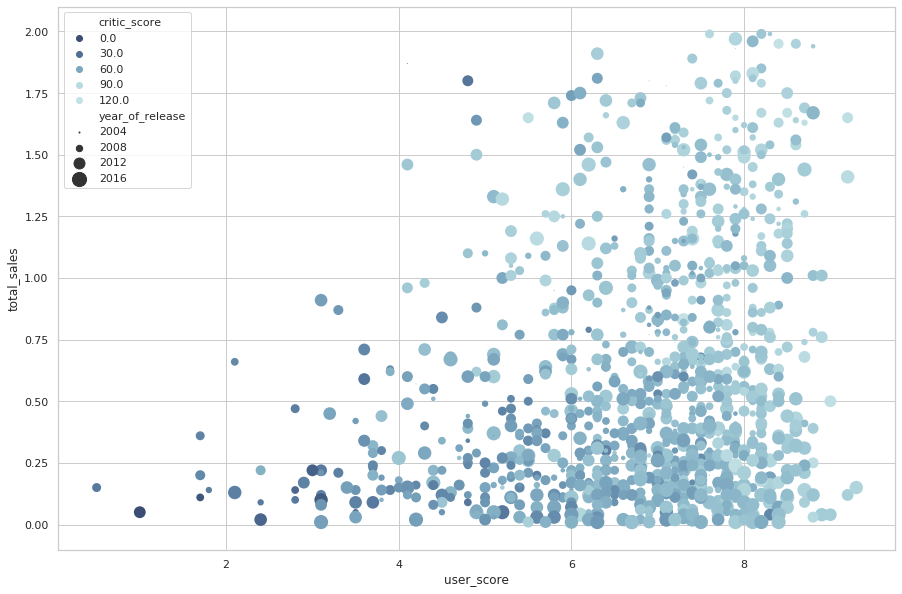

In [171]:
explorer.sns_scatterplot(platform_scores_not_ps4, 'user_score', 'total_sales', 'critic_score', 'year_of_release', True)

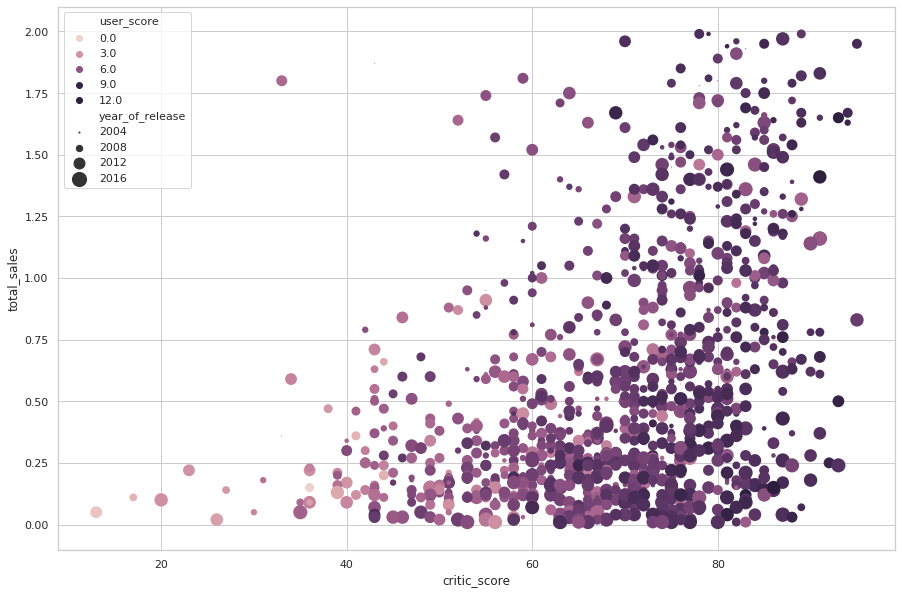

In [172]:
explorer.sns_scatterplot(platform_scores_not_ps4, 'critic_score', 'total_sales', 'user_score', 'year_of_release', False)

**Сформулируем промежуточный вывод:**

1. Для других популярных платформ можно сделать аналогичное наблюдение - чем выше оценки пользователей и критиков, тем выше продажи (и наоборот). 
2. Влияние оценок пользователей выше, чем в случае с продажами для ps4. При этом, визуально выглядит так, словно критики оказывают меньшее влияние. В отличие от выборки с PS4 - есть игры которые относительно хорошо продавались и при невысоких оценках критиков, и их, в целом, немало.

#### - Посчитаем корреляцию между отзывами и продажами

In [173]:
explorer.pandahug(platform_scores_not_ps4.corr().total_sales).style.apply(explorer.highlight_sorted_corr)

,total_sales
year_of_release,-0.181697
na_sales,0.79223
eu_sales,0.817457
jp_sales,0.375403
other_sales,0.847553
critic_score,0.411532
user_score,0.240285
total_sales,1


&#9889; **Вывод:**

1. В целом положение вещей с продажами на PS4 и на других платформах схоже - чем выше оценки пользователей и критиков, тем выше продажи (и наоборот).
2. Но есть и особенности: влияние оценок пользователей выше, чем в случае с продажами для ps4. В отличие от выборки с PS4 - есть игры которые относительно хорошо продавались и при невысоких оценках критиков, и их, в целом, немало.
3. В выборке наблюдается сильная положительная корреляция между оценкой критиков и продажами аналогичная корреляции в датасете с PS4 (0.41), но в отличие от последнего, наблюдается относительно сильная положительная корреляция между оценками пользователей и продажами (0.24).

[В оглавление](#TOC)

## 11) Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами? <a class="anchor" id="3_11"></a>

#### - Выведем на экан соотношение игр по жанрам

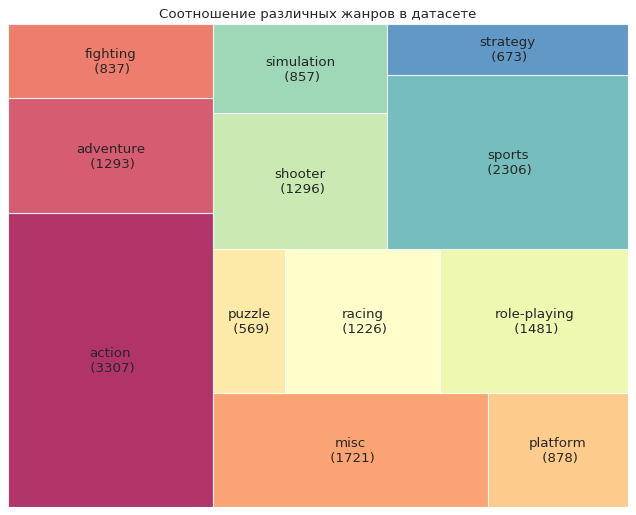

In [174]:
df_genres = df.groupby('genre').size().reset_index(name='counts')
labels = df_genres.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df_genres['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

plt.figure(figsize=(10,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

plt.title('Соотношение различных жанров в датасете')
plt.axis('off')
plt.show()

#### - Выведем цифровые значения

In [175]:
genre

,name
genre,
action,3369
sports,2348
misc,1750
role-playing,1498
shooter,1323
adventure,1303
racing,1249
platform,888
simulation,873


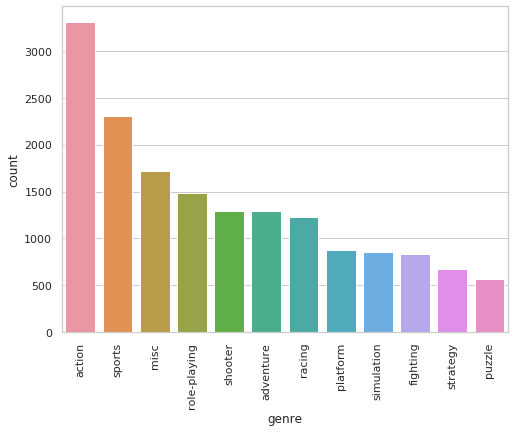

In [176]:
explorer.categorical_counter_plot(df, 'genre', 8, 6)

Самые популярные жанры - экшн (лидер с большим отрывом), спортивные симуляторы, внежанровые игры, рпг и шутеры. Сделаем срез по самым популярным платформам 

In [177]:
genres_sales = df.query('platform == ["ps4", "psv", "xone", "3ds", "ps3"] and year_of_release > 2013')

In [178]:
genres_sales.eval('na_sales_percent = na_sales / total_sales', inplace = True)
genres_sales.eval('eu_sales_percent = eu_sales / total_sales', inplace = True)
genres_sales.eval('jp_sales_percent = jp_sales / total_sales', inplace = True)

In [179]:
pivot_genres = genres_sales.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum')
pivot_genres['sum'] = pivot_genres.total_sales.sum()
pivot_genres.eval('percent = total_sales / sum', inplace = True)

(-1.116637491775964,
 1.1007922615131411,
 -1.1230868231473352,
 1.1106020958151894)

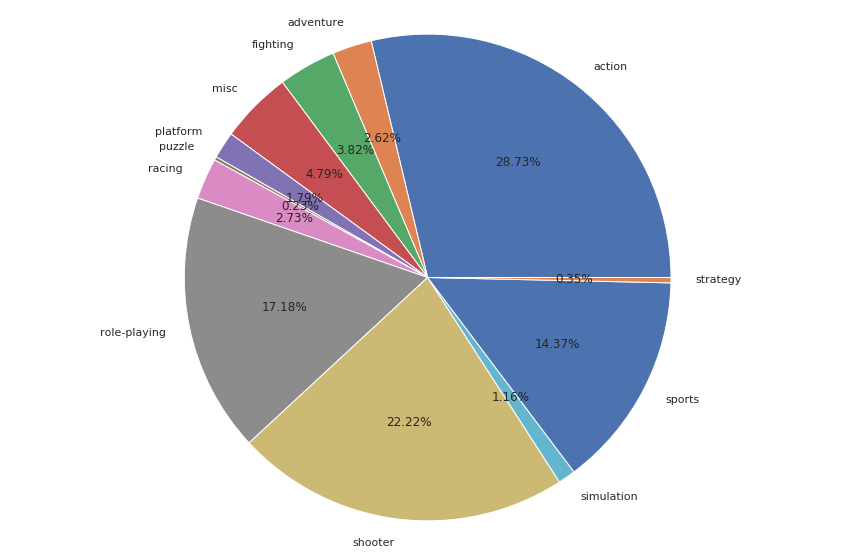

In [180]:
fig, ax = plt.subplots(figsize=(15,10))
ax = plt.pie(pivot_genres['percent'].values, labels = pivot_genres.index,
autopct='%0.2f%%')
plt.axis('equal')

&#9889; **Вывод:** 

1. Два самых популярных жанра - экшен и спортивные симуляторы.
2. Самыми прибыльными жанрами являются экшены, РПГ, шутеры и спортивные симуляторы, которые собирают больше 80 % продаж.
3. Паззлы, эдвенчуры и стратегии продаются хуже других.
4. Важно отметить, что современный рынок компьютерных игр в своей массе давно уже стал внежанровым - редкие появления чистых шутеров (например, Вольфенштайн или Дум), или чистых платформеров, вроде Mark of the Ninja или Shank, скорее подчеркивают общее смешение жанров.

[В оглавление](#TOC)

## 12) Проверим гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". <a class="anchor" id="3_12"></a>

#### - Сделаем два среза в отношении которых будем проводить тест

In [182]:
df_stat = df.query('user_score != -1 and critic_score != -1')

In [183]:
df_stat_xone = df_stat.query('platform == "xone"')
df_stat_pc = df_stat.query('platform == "pc"')

#### - Сформулируем нулевую и альтернатиные гипотезы

1. Нулевую гипотезу, которую проверяет тест, сформулируем так: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".

2. Альтернативную гипотезу, соответственно, сформулируем так: "Средние пользовательские рейтинги платформ Xbox One и PC различаются".

#### - Примем уровень значимости в 5 %.

In [184]:
alpha = 0.05

#### - Проведем тест и получим p-значение

In [185]:
tstatistic, pval = ttest_ind(df_stat_xone.user_score, df_stat_pc.user_score, equal_var = False)
pval

3.237925656023916e-05

#### - Сравним p-значение с уровнем значимости

In [186]:
pval < alpha

True

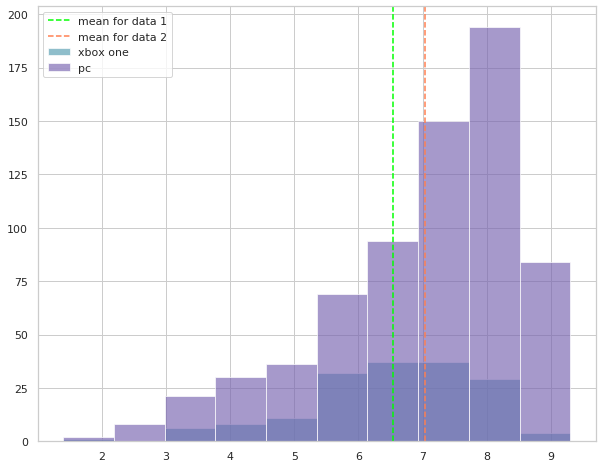

In [187]:
explorer.overlaid_histogram(df_stat_xone.user_score, df_stat_pc.user_score, data1_name = 'xbox one', data2_name = 'pc')

&#9889; **Вывод:** исходя из представленных данных, на уровне значимости 5% - есть основания отвергнуть нулевую гипотезу в пользу альтернативы. Средние пользовательские рейтинги платформ Xbox One и PC различаются.

[В оглавление](#TOC)

## 13) Проверим гипотезу: "Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные". <a class="anchor" id="3_13"></a>

#### - Сделаем два среза в отношении которых будем проводить тест

In [188]:
df_stat_action = df_stat.query('genre == "action"')
df_stat_sports = df_stat.query('genre == "sports"')

#### - Сформулируем нулевую и альтернатиные гипотезы

1. Нулевую гипотезу, которую проверяет тест, сформулируем так: "Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») одинаковы".

2. Альтернативную гипотезу, соответственно, сформулируем так: "Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные".

#### - Примем уровень значимости в 5 %.

In [189]:
alpha = 0.05

#### - Проведем тест и получим p-значение

In [190]:
tstatistic, pval = ttest_ind(df_stat_action.user_score, df_stat_sports.user_score, equal_var = False)
pval

0.9787827074917653

#### - Сравним p-значение с уровнем значимости

In [191]:
pval < alpha

False

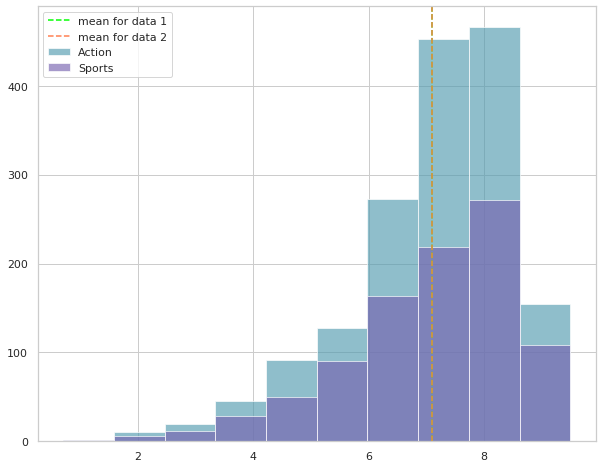

In [192]:
explorer.overlaid_histogram(df_stat_action.user_score, df_stat_sports.user_score, data1_name = 'Action', data2_name = 'Sports')

&#9889; **Вывод:** исходя из представленных данных, на уровне значимости 5% - нет оснований отвергнуть нулевую гипотезу в пользу альтернативы. Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») одинаковы.

[В оглавление](#TOC)

## 14) Портреты пользователя каждого региона <a class="anchor" id="3_14"></a>

Сделаем два среза в отношении которых будем проводить тест: продажи за три последних года и с возрастным рейтингом и без возрастного рейтинга

In [193]:
df_region_rated = df.query('year_of_release > 2013 and rating != "ne"')

In [194]:
df_region_not_rated = df.query('year_of_release > 2013 and rating == "ne"')

## Северная Америка <a class="anchor" id="3_NA"></a>

### Самые популярные платформы Северной Америки (топ-5)

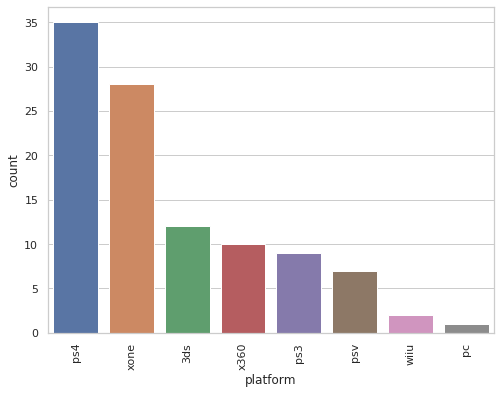

In [195]:
explorer.categorical_counter_plot(df.query('year_of_release > 2013 and eu_sales == 0 and jp_sales == 0'), 'platform', 8, 6)

&#9889; **Вывод:** 

1. Самые популярные платформы в Северной Америке - PS4 и Xbox One. Обе приставки лидируют более, чем с двукратным разрывом от близжайшего преследователя Nintendo 3DS. 
2. Cледует отметить, что представленные в списке Xbox360 и PS3 фактически уходят с рынка. 
3. На последнем месте - PC.
4. Рынок ориентирован на консольный гейминг.

[В оглавление](#TOC)

### Самые популярные жанры Северной Америки (топ-5)

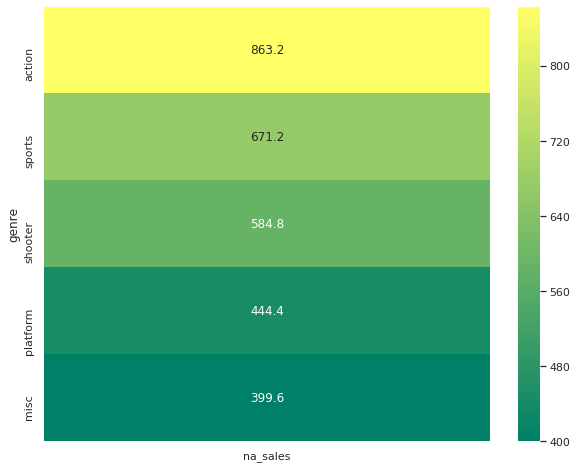

In [196]:
top_genres_na = pd.DataFrame(df.groupby('genre').na_sales.sum())
top_genres_na = top_genres_na.sort_values('na_sales', ascending = False).head(5)
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(top_genres_na), cmap = 'summer', annot=True, fmt = '.1f')

&#9889; **Вывод:** самые популярные жанры в Северной Америке - экшены, с некоторым отрывом. Далее идет группа - спортивные симуляторы и шутеры, а замыкают пятерку платформеры и внежанровные игры.

[В оглавление](#TOC)

### Выясним влияет ли рейтинг ESRB на продажи в Северной Америке?

In [197]:
rated_na = explorer.pandahug(df_region_rated.na_sales.describe())
not_rated_na = explorer.pandahug(df_region_not_rated.na_sales.describe())

In [198]:
explorer.Display('rated_na', 'not_rated_na')

,na_sales
count,940.00000
mean,0.23334
std,0.45552
min,0.00000
25%,0.01000
50%,0.06000
75%,0.24000
max,3.96000
,na_sales
count,749.000000


&#9889; **Вывод:** для Северной Америки средние продажи рейтингованных игр выше.

[В оглавление](#TOC)

## Европа <a class="anchor" id="3_EU"></a>

### Самые популярные платформы Европы (топ-5)

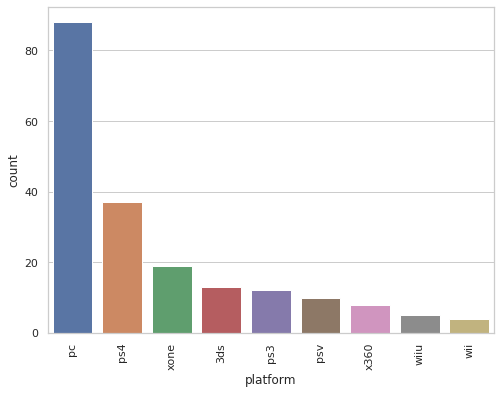

In [201]:
explorer.categorical_counter_plot(df.query('year_of_release > 2013 and jp_sales == 0 and na_sales == 0'), 'platform', 8, 6)

&#9889; **Вывод:** 

1. В отличие от Северной Америки в Европе с колоссальным, почти троекратным, отрывом в качестве игровой платформы лидирет персональный компьютер.
2. На втором месте - PS4, а следом за ним, с двухкратным отрывом от PS4, идет Xbox One.
2. На последнем месте - Wii U и Wii.
4. Рынок ориентирован на персональный компьютер.

[В оглавление](#TOC)

### Самые популярные жанры Европы (топ-5)

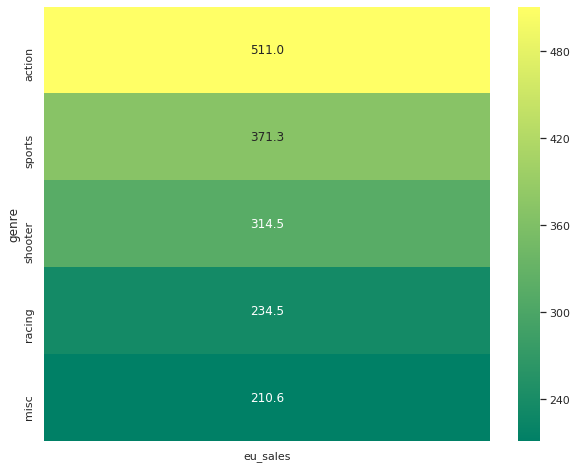

In [202]:
top_genres_eu = pd.DataFrame(df.groupby('genre').eu_sales.sum())
top_genres_eu = top_genres_eu.sort_values('eu_sales', ascending = False).head(5)
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(top_genres_eu), cmap = 'summer', annot=True, fmt = '.1f')

&#9889; **Вывод:** самые популярные жанры в Европе похожи на предпочтения Северной Америки - экшены, с некоторым отрывом. Далее идет группа - спортивные симуляторы и шутеры, далее - и тут отличие - вместо платформеров гонки, а замыкают список внежанровные игры.

[В оглавление](#TOC)

### Выясним влияет ли рейтинг ESRB на продажи в Европе?

In [203]:
rated_eu = explorer.pandahug(df_region_rated.eu_sales.describe())
not_rated_eu = explorer.pandahug(df_region_not_rated.eu_sales.describe())

In [204]:
explorer.Display('rated_eu', 'not_rated_eu')

,eu_sales
count,940.000000
mean,0.225245
std,0.533018
min,0.000000
25%,0.020000
50%,0.060000
75%,0.210000
max,6.310000
,eu_sales
count,749.000000


&#9889; **Вывод:** для Европы средние продажи рейтингованных игр выше.

[В оглавление](#TOC)

## Япония <a class="anchor" id="3_JP"></a>

### Самые популярные платформы Японии (топ-5)

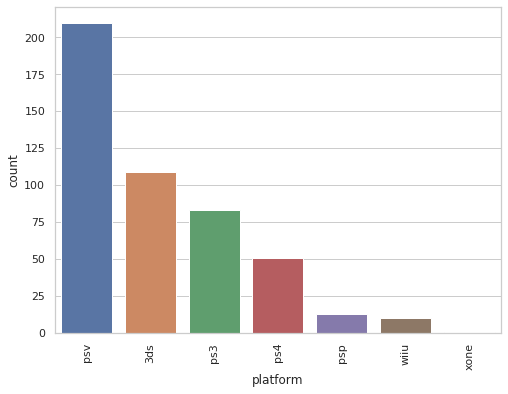

In [205]:
explorer.categorical_counter_plot(df.query('year_of_release > 2013 and eu_sales == 0 and na_sales == 0'), 'platform', 8, 6)

&#9889; **Вывод:** 

1. В отличие от Европы и Северной Америки в Японии с первые две строчки занимают мобильные платформы PS Vita (с двукратным отрывом) и Nintendo 3DS, и уже после PS3 и PS4.  
2. Рынок ориентирован на мобильный гейминг.

[В оглавление](#TOC)

### Самые популярные жанры Японии (топ-5)

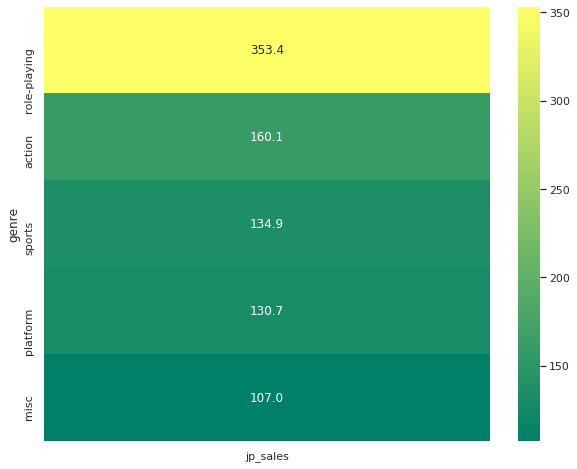

In [206]:
top_genres_jp = pd.DataFrame(df.groupby('genre').jp_sales.sum())
top_genres_jp = top_genres_jp.sort_values('jp_sales', ascending = False).head(5)
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(top_genres_jp), cmap = 'summer', annot=True, fmt = '.1f')

&#9889; **Вывод:** Япония - особый регион. Ролевые игры более чем вдвое лидируют по сравнению с другими жанрами (а в Европе и Северной Америке РПГ вообще не вошли в пятерку). Затем уже экшены, спортивные симуляторы, платформеры и внежанровые игры.

### Выясним влияет ли рейтинг ESRB на продажи в Японии?

In [207]:
rated_jp = explorer.pandahug(df_region_rated.jp_sales.describe())
not_rated_jp = explorer.pandahug(df_region_not_rated.jp_sales.describe())

In [208]:
explorer.Display('rated_jp', 'not_rated_jp')

,jp_sales
count,940.00000
mean,0.03850
std,0.13851
min,0.00000
25%,0.00000
50%,0.00000
75%,0.03000
max,2.62000
,jp_sales
count,749.000000


&#9889; **Вывод:** для Японии средние продажи рейтингованных игр ниже.

[В оглавление](#TOC)

## **Вывод:** <a class="anchor" id="3_conclusion"></a>

1. **В ходе анализа данных было установлено:**

    1) значение "tbd" означает, что в базе данных www.metacritic.com содержится менее четырех отзывов об игре;
    
    2) на протяжении десятилетия с 1980 до 1990 года - выпускали мало игр, что нашло отражение в датасете. Начиная с девяностых происходит взрывной рост рынка компьютерных игр - вплоть до появления первого айфона рынок компьютерных и консольных игр показывал рост, но уже к 2016 году объем выпуска снизился втрое. Теперь крайне существенную роль играет рынок мобильных игр для iOS и Android. Показатели продаж за все периоды представляют только исторический интерес;
    
    3) характерный срок доминирования платформы - от четырех до пяти лет;
    
    4) разумно предположить, что исходя из представленных платформ - в 2017 году больше всего игр будет продаваться для платформ PS4, Nintendo 3DS, Xbox One и Wii U (либо для преемников данных платформ);
    
    5) в лидерах продаж выделяются три группы платформ: больше всего продажи игр для двух поколений флагманских приставок от Сони, далее идет Xbox One и Nintendo 3DS, и замыкает, с сильным отставанием, мобильная платформа PS Vita. Средние продажи приставок от Сони и Майкрософт не сильно отличаются друг от друга, средние продажи игр для мобильных консолей отстают от приставок, и сильно различаются между собой;
    
    6) не все средние значения продаж игр на платформах PS3, PS4, Nintendo 3DS, Xbox One, PS Vita одинаковы. Средние значения продаж игр различаются на платформах Nintendo 3DS и PS Vita, PS3 и PS4, PS4 и PS Vita, PS Vita и Xbox One;
    
    7) средние значения продаж игр одинаковы, в том чисиле, на платформах PS4 и Xbox One, а также на платформе PS3 и Xbox One, при том что средние продажи PS3 и PS4 статистически значимо различаются;
    
    8) чем выше оценки пользователей и критиков, тем выше продажи (и наоборот);
    
    9) в выборке наблюдается сильная положительная корреляция между оценкой критиков и продажами (0.41), наблюдается относительно сильная положительная корреляция между оценками пользователей и продажами (0.24);
    
    10) предыдущий вывод оличается для PS4 - пользовательская оценка оказывает меньшее влияние на продажи, чем оценка критков, установлена слабая отрицательная корреляция между оценками пользователей и продажами (0.027);
    
    11) два самых популярных жанра - экшен и спортивные симуляторы;
    
    12) самыми прибыльными жанрами являются шутеры и спортивные симуляторы, а не экшены;
    
    13) паззлы, эдвенчуры и стратегии продаются хуже других;


2. **В ходе анализа проверены гипотезы:**

    1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые: исходя из представленных данных, на уровне значимости 5% - есть основания отвергнуть нулевую гипотезу в пользу альтернативы. Средние пользовательские рейтинги платформ Xbox One и PC различаются.
    
    2) Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные: исходя из представленных данных, на уровне значимости 5% - нет оснований отвергнуть нулевую гипотезу в пользу альтернативы. Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») одинаковы.
    

3. **В ходе анализа составлены портреты пользователя каждого региона.**

  1) Северная Америка: 
    
    - самые популярные платформы - PS4 и Xbox One, на последнем месте - PC, рынок ориентирован на консольный гейминг;
    - самые популярные жанры в Северной Америке - экшены, спортивные симуляторы и шутеры, платформеры и внежанровные игры;
    - для Северной Америки средние продажи рейтингованных игр выше.
    
  2) Европа: 
    
    - самая популярная платформа с колоссальным отрывом - персональный компьютер, на втором месте - PS4, а следом за ним, с двухкратным отрывом от PS4, идет Xbox One. Рынок ориентирован на персональный компьютер;
    - самые популярные жанры в Европе - экшены, спортивные симуляторы, шутеры, гонки и внежанровные игры;
    - для Европы средние продажи рейтингованных игр выше.
    
  3) Япония:
    
    - популярнее других - мобильные платформы PS Vita (с двукратным отрывом) и Nintendo 3DS, и уже после PS3 и PS4. Рынок ориентирован на мобильный гейминг;
    - самые популярные жанры в Японии - ролевые игры, экшены, спортивные симуляторы, платформеры и внежанровые игры;
    - для Японии средние продажи рейтингованных игр ниже.
    

3. **В ходе анализа был поготовлен алгоритм k близжайших соседей, предсказывающий оценки критиков и пользовательских оценок.**

[В оглавление](#TOC)

# IV. Выводы <a class="anchor" id="final"></a>
***

**1.** Принимая во внимание результаты исследования, для проджи игр необходимо диверсифицировать подход для различных регионов: в Северной Америке и Европе вкладываться в рекламу экшенов, шутеров и спортивных симуляторов, а в Японии сделать уклон в сторону РПГ. 


**2.** При этом для Северной Америки следует продвигать игры на консоли, для Европы для персональных компьютеров, а в Японии сосредоточиться на мобильных платформах.


**3.** Важно отметить, что пользователи ориентируются на оценки критиков и, при множественности оценок, других пользвателей. Эту нишу ложного авторитета может занять искуственный интеллект, который будет рекомендовать пользователю игры исходя из его предподчтений. Таким образом, у пользователя возникает полезное чувство контроля над собственным выбором, поскольку искусственный интеллект лишен подавляющей воли. Вот во что следует вложить деньги при планировании рекламной компании - рекомендательная система (например, по алгоритму k близжайших соседей).
    
**Ограничения исследования:** для исследования остро не хватает контекства в котором проводится анализ. Мы ничего не знаем о заказчике, в каком финансовом состоянии он находится, какую нишу занимает, кто его клиент, его основные конкуренты, каков его оборот и какие цели.

[В оглавление](#TOC)